In [1]:
# import libraries
import pandas as pd     # library for data analysis and manipulation tools
import numpy as np      # library for scientific computing and data manipulation
import pyodbc           # library for connecting to SQL Server
import matplotlib.pyplot as plt    # library for creating static, animated, and interactive visualizations
import seaborn as sns   # library for making statistical graphics in Python
from scipy.stats import mode      # library for statistics and mathematical functions
import os               # library for interacting with operating system

In [2]:
# Establish a connection to the Access database
conn = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=C:\Users\brand\OneDrive - Universidad Central del Ecuador\Tesis Información\AC_SACHA_AGO_2023_U_T.mdb;')
# Define your SQL queries with just columns we need
sql_query_maestra = 'SELECT WELL_LEGAL_NAME, WELLBORE_ID, COMPLETION_COORDINATE_X, COMPLETION_COORDINATE_Y, COMPLETION_LEGAL_NAME, RSVR_NAME, FIELD, CURR_STATUS FROM MAESTRA'
# sql_query_sc_all = 'SELECT * FROM SC'
sql_query_sc = 'SELECT COMPLETION_LEGAL_NAME, FECHA_COMPLETACION, RESERVORIO FROM SC'
sql_mensual = 'SELECT * FROM MENSUAL'
sql_diaria = 'SELECT * FROM DIARIA'
sql_iny_diaria = 'SELECT * FROM INY_DIARIA'
sql_production_test = 'SELECT * FROM PRUEBA_POZO'

In [3]:
# Execute the queries and fetch the data into a DataFrames
df_maestra = pd.read_sql(sql_query_maestra, conn)
df_sc = pd.read_sql(sql_query_sc, conn)
df_mensual = pd.read_sql(sql_mensual, conn)
df_diaria = pd.read_sql(sql_diaria, conn)
df_iny_diaria = pd.read_sql(sql_iny_diaria, conn)
df_production_test = pd.read_sql(sql_production_test, conn)

# Close the database connection
conn.close()

C:\Users\brand\AppData\Local\Temp\ipykernel_14912\1705036465.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_maestra = pd.read_sql(sql_query_maestra, conn)
C:\Users\brand\AppData\Local\Temp\ipykernel_14912\1705036465.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sc = pd.read_sql(sql_query_sc, conn)
C:\Users\brand\AppData\Local\Temp\ipykernel_14912\1705036465.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_mensual = pd.read_sql(sql_mensual, conn)
C:\Users\brand\AppData\Local\Temp\ipykernel_14912\170503

In [4]:
# Establish a connection to the Access database AC_SACHA_DIC_2020.mdb
conn = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=C:\Users\brand\OneDrive - Universidad Central del Ecuador\Tesis Información\AC_SACHA_DIC_2020.mdb;')
# Define your SQL queries with just columns we need
sql_query_maestra = 'SELECT WELL_LEGAL_NAME, WELLBORE_ID, COMPLETION_COORDINATE_X, COMPLETION_COORDINATE_Y, COMPLETION_LEGAL_NAME, RSVR_NAME, FIELD, CURR_STATUS FROM MAESTRA'
sql_query_sc = 'SELECT COMPLETION_LEGAL_NAME, FECHA_COMPLETACION, RESERVORIO FROM SC'

# Execute the queries and fetch the data into a DataFrames
df_maestra_2020 = pd.read_sql(sql_query_maestra, conn)
df_sc_2020 = pd.read_sql(sql_query_sc, conn)

# Close the database connection
conn.close()

C:\Users\brand\AppData\Local\Temp\ipykernel_14912\65671436.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_maestra_2020 = pd.read_sql(sql_query_maestra, conn)
C:\Users\brand\AppData\Local\Temp\ipykernel_14912\65671436.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sc_2020 = pd.read_sql(sql_query_sc, conn)


In [5]:
df_maestra_copy = df_maestra.copy()

### Wells which don't have in the main dataset

In [6]:
# Listas originales
pozos_Ui = [
    "SCHA-225", "SCHAB-316", "SCHAF-549H", "SCHAH-403", "SCHE-049", "SCHG-274", "SCHK-187",
    "SCHA-418", "SCHAB-341", "SCHAG-393", "SCHAH-405", "SCHE-166", "SCHG-276", "SCHK-195",
    "SCHAB-311", "SCHAC-351", "SCHAG-395", "SCHB-004B", "SCHE-205", "SCHI-179H", "SCHM-333",
    "SCHAB-314", "SCHAC-352", "SCHAG-397S1", "SCHD-020", "SCHF-246", "SCHJ-152",
    "SCHAB-315", "SCHAF-381", "SCHAH-402", "SCHD-251", "SCHF-248", "SCHK-100"
]

pozos_Ti = [
    "SCHA-225", "SCHAC-357", "SCHAH-401", "SCHB-204", "SCHK-195", "SCHP-188",
    "SCHA-190", "SCHAC-359", "SCHAH-402", "SCHB-235", "SCHN-163S1", "SCHS-177",
    "SCHAB-341", "SCHAE-375", "SCHAH-403", "SCHB-236", "SCHO-149",
    "SCHAC-350", "SCHAF-387S1", "SCHAH-405", "SCHC-010", "SCHP-151",
    "SCHAC-355", "SCHAF-529H", "SCHAH-406", "SCHE-049", "SCHP-181"
]

# Convertir las listas a conjuntos y unirlos
conjunto_combinado = set(pozos_Ui).union(set(pozos_Ti))

# Convertir el conjunto combinado a una lista
lista_combinada = list(conjunto_combinado)

In [7]:
Wells_as_PLAN_maestra_2020 = list(conjunto_combinado - set(df_maestra_2020['WELL_LEGAL_NAME']))

# Imprimir los pozos no encontrados
print(Wells_as_PLAN_maestra_2020)

['SCHAG-397S1', 'SCHAC-359', 'SCHA-418', 'SCHAC-357']


In [8]:
Wells_in_maestra_2020 = df_maestra_2020[df_maestra_2020['WELL_LEGAL_NAME'].isin(conjunto_combinado)]

Wells_in_maestra_2020 = Wells_in_maestra_2020[Wells_in_maestra_2020['RSVR_NAME'] != 'TIYUYACU']
# elimina aquellos que tienen PL en COMPLETION_LEGAL_NAME
Wells_in_maestra_2020 = Wells_in_maestra_2020[~Wells_in_maestra_2020['COMPLETION_LEGAL_NAME'].str.contains('PL')]

Wells_in_maestra_2020.head()

,WELL_LEGAL_NAME,WELLBORE_ID,COMPLETION_COORDINATE_X,COMPLETION_COORDINATE_Y,COMPLETION_LEGAL_NAME,RSVR_NAME,FIELD,CURR_STATUS
552,SCHA-225,b05HuB6PYP,291313.425758,9.963710e+06,SCHA-225TI,LOWER T,SCHC,P
554,SCHA-225,b05HuB6PYP,291313.183534,9.963711e+06,SCHA-225UI,LOWER U,SCHC,S
556,SCHA-190,aD1FDo1ebW,290990.296978,9.964089e+06,SCHA-190TI,LOWER T,SCHC,P
561,SCHA-190,aD1FDo1ebW,290990.317930,9.964089e+06,SCHA-190UI,LOWER U,SCHC,N
601,SCHAB-314,1SftJ0pnY8,292383.470877,9.955882e+06,SCHAB-314UI,LOWER U,SCHS,S


In [9]:
# Guardar una copia de los datos originales
original_data = df_maestra_2020[df_maestra_2020['WELL_LEGAL_NAME'].isin(conjunto_combinado)].copy()

# Primera operación de eliminación
data_after_first_elimination = original_data[original_data['RSVR_NAME'] != 'TIYUYACU']

# Encontrar los elementos eliminados después de la primera operación
first_eliminated = original_data.loc[~original_data.index.isin(data_after_first_elimination.index)]

# Segunda operación de eliminación
data_after_second_elimination = data_after_first_elimination[~data_after_first_elimination['COMPLETION_LEGAL_NAME'].str.contains('PL')]

# Encontrar los elementos eliminados después de la segunda operación
second_eliminated = data_after_first_elimination.loc[~data_after_first_elimination.index.isin(data_after_second_elimination.index)]

# Juntar todos los elementos eliminados
all_eliminated = pd.concat([first_eliminated, second_eliminated])

all_eliminated.head()

,WELL_LEGAL_NAME,WELLBORE_ID,COMPLETION_COORDINATE_X,COMPLETION_COORDINATE_Y,COMPLETION_LEGAL_NAME,RSVR_NAME,FIELD,CURR_STATUS
590,SCHAC-350,None,292823.1300,9958069.140,SCHAC-350UI-PLAN,None,SCH,X
592,SCHAB-315,None,291511.0000,9956350.000,SCHAB-315HS-PLAN,None,SCH,X
643,SCHAC-355,None,292682.7985,9957073.161,SCHAC-355HS-PLAN,None,SCH,X
690,SCHAG-395,None,287937.0000,9950950.000,SCHAG-395HI-PLAN,None,SCH,X
702,SCHAF-381,None,290932.6600,9950605.940,SCHAF-381T-PLAN,None,SCH,X


In [10]:
well_eliminated = all_eliminated['WELL_LEGAL_NAME'].unique()
well_eliminated

array(['SCHAC-350', 'SCHAB-315', 'SCHAC-355', 'SCHAG-395', 'SCHAF-381',
       'SCHAH-401', 'SCHAG-393', 'SCHAF-529H', 'SCHB-236', 'SCHK-187',
       'SCHJ-152', 'SCHO-149'], dtype=object)

In [11]:
# Concatenar las dos listas
all_eliminated = list(all_eliminated['COMPLETION_LEGAL_NAME'].unique())

all_eliminated

['SCHAC-350UI-PLAN',
 'SCHAB-315HS-PLAN',
 'SCHAC-355HS-PLAN',
 'SCHAG-395HI-PLAN',
 'SCHAF-381T-PLAN',
 'SCHAH-401T-PLAN',
 'SCHAG-393BT-PLAN',
 'SCHAF-529HUI-PLA',
 'SCHAH-401U-PLAN',
 'SCHB-236U-PLAN',
 'SCHB-236T-PLAN',
 'SCHK-187HS-PLAN',
 'SCHJ-152HI-PLAN',
 'SCHK-187HI-PLAN',
 'SCHO-149H-PLAN']

In [12]:
# Establece 'COMPLETION_LEGAL_NAME' como el índice en ambos DataFrames
df_maestra.set_index('COMPLETION_LEGAL_NAME', inplace=True)
Wells_in_maestra_2020.set_index('COMPLETION_LEGAL_NAME', inplace=True)

# Actualiza los valores de df_maestra con los de Wells_in_maestra_2020 donde coincidan
df_maestra.update(Wells_in_maestra_2020)

# Restablece el índice
df_maestra.reset_index(inplace=True)

In [13]:
df_maestra_copy[df_maestra_copy['WELL_LEGAL_NAME'] == 'SCHAB-314']

,WELL_LEGAL_NAME,WELLBORE_ID,COMPLETION_COORDINATE_X,COMPLETION_COORDINATE_Y,COMPLETION_LEGAL_NAME,RSVR_NAME,FIELD,CURR_STATUS
274,SCHAB-314,S-AB314,289935.82,9955795.32,SCHAB-314UI,LOWER U,SCHS,Cerrado


In [14]:
df_maestra[df_maestra['WELL_LEGAL_NAME'] == 'SCHAB-314']

,COMPLETION_LEGAL_NAME,WELL_LEGAL_NAME,WELLBORE_ID,COMPLETION_COORDINATE_X,COMPLETION_COORDINATE_Y,RSVR_NAME,FIELD,CURR_STATUS
274,SCHAB-314UI,SCHAB-314,1SftJ0pnY8,292383.470877,9.955882e+06,LOWER U,SCHS,S


# MAESTRA

In [15]:
# Assign the name of the well to the column 'WELL_LEGAL_NAME' to WELLBORE_ID
df_maestra['POZO_ID'] = df_maestra['WELL_LEGAL_NAME']
df_maestra['WELLBORE_ID'] = df_maestra['COMPLETION_LEGAL_NAME']

# Apply just where WELLBORE_ID to replace('-', '')
df_maestra['WELLBORE_ID'] = df_maestra['WELLBORE_ID'].str.replace('-', '')
df_maestra['POZO_ID'] = df_maestra['POZO_ID'].str.replace('-', '')

df_maestra['WELLBORE_ID'] = df_maestra['WELLBORE_ID'].str.replace('SCH', 'S-')
df_maestra['POZO_ID'] = df_maestra['POZO_ID'].str.replace('SCH', 'S-')

df_maestra['WELLBORE_ID'] = df_maestra['WELLBORE_ID'].replace(['-00', '-0'], '-', regex=True)
df_maestra['POZO_ID'] = df_maestra['POZO_ID'].replace(['-00', '-0'], '-', regex=True)

df_maestra.head(5)

,COMPLETION_LEGAL_NAME,WELL_LEGAL_NAME,WELLBORE_ID,COMPLETION_COORDINATE_X,COMPLETION_COORDINATE_Y,RSVR_NAME,FIELD,CURR_STATUS,POZO_ID
0,SCH-002BTI,SCH-002B,S-2BTI,289935.8200,9.955795e+06,LOWER T,SCHS,Cerrado,S-2B
1,SCH-002BUI,SCH-002B,S-2BUI,289935.8200,9.955795e+06,LOWER U,SCHS,Abandonado,S-2B
2,SCH-002TI,SCH-002,S-2TI,289933.0700,9.955781e+06,LOWER T,SCHS,Abandonado,S-2
3,SCH-002UI,SCH-002,S-2UI,289933.0700,9.955781e+06,LOWER U,SCHS,Abandonado,S-2
4,SCH-003TI,SCH-003,S-3TI,295091.5183,9.968342e+06,LOWER T,SCHN1,Cerrado,S-3


In [16]:
replace_values = {'Arenisca T': 'TI', 'MAIN U': 'UI', 'LOWER T': 'TI', 'LOWER U': 'UI', 'TIYUYACU': 'TY', 'UPPER T': 'TI', 'UPPER U': 'UI'}

df_maestra['RSVR_NAME'] = df_maestra['RSVR_NAME'].replace(replace_values)

df_maestra.drop(df_maestra[df_maestra['RSVR_NAME'] == 'TY'].index, inplace = True)

# remplace the Status to original master 2023
df_maestra['CURR_STATUS'] = df_maestra['COMPLETION_LEGAL_NAME'].map(df_maestra_copy.set_index('COMPLETION_LEGAL_NAME')['CURR_STATUS'])

df_maestra.head()

,COMPLETION_LEGAL_NAME,WELL_LEGAL_NAME,WELLBORE_ID,COMPLETION_COORDINATE_X,COMPLETION_COORDINATE_Y,RSVR_NAME,FIELD,CURR_STATUS,POZO_ID
0,SCH-002BTI,SCH-002B,S-2BTI,289935.8200,9.955795e+06,TI,SCHS,Cerrado,S-2B
1,SCH-002BUI,SCH-002B,S-2BUI,289935.8200,9.955795e+06,UI,SCHS,Abandonado,S-2B
2,SCH-002TI,SCH-002,S-2TI,289933.0700,9.955781e+06,TI,SCHS,Abandonado,S-2
3,SCH-002UI,SCH-002,S-2UI,289933.0700,9.955781e+06,UI,SCHS,Abandonado,S-2
4,SCH-003TI,SCH-003,S-3TI,295091.5183,9.968342e+06,TI,SCHN1,Cerrado,S-3


### Maestra Resume

In [17]:
print(r'Amount of wells: {}'.format(df_maestra['WELL_LEGAL_NAME'].nunique()))
print(r'Amount of completions: {}'.format(df_maestra['WELLBORE_ID'].nunique()))
print(r'Reservoirs: {}'.format(df_maestra['RSVR_NAME'].unique()))
print('Status of wells:')
print(df_maestra['CURR_STATUS'].value_counts())

Amount of wells: 378
Amount of completions: 560
Reservoirs: ['TI' 'UI']
Status of wells:
Cerrado        307
Produciendo    214
Abandonado      26
Inyectando      13
Name: CURR_STATUS, dtype: int64


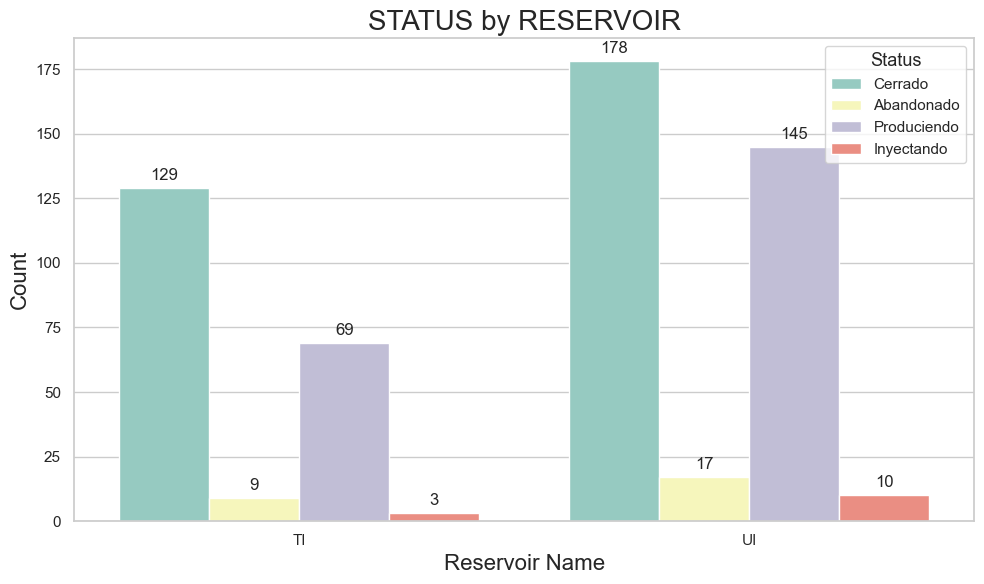

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the necessary columns exist in the DataFrame
assert 'CURR_STATUS' in df_maestra, "'CURR_STATUS' not found in df_maestra"
assert 'RSVR_NAME' in df_maestra, "'RSVR_NAME' not found in df_maestra"

# Set the style of the plot
sns.set(style="whitegrid")

# Create a stacked bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.countplot(data=df_maestra, x='RSVR_NAME', hue='CURR_STATUS', palette="Set3")

# Add title and labels
plt.title('STATUS by RESERVOIR', fontsize=20)
plt.xlabel('Reservoir Name', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Add a legend
bar_plot.legend(title='Status', title_fontsize='13', loc='upper right')

# Annotate values on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

# Show the plot with a tight layout
plt.tight_layout()
plt.show()

# POZOS

In [19]:
def read_survey_KB(file):
    # Initialize variables to store the well name and KB value
    well_name = None
    KB_value = None
    
    # Open the file and extract the well name and KB value
    with open(file, 'r') as f:
        for line in f:
            if "WELL NAME:" in line:
                well_name = line.split("WELL NAME:")[1].strip()
            elif "WELL OFFSET (from MSL):" in line:
                # Split the line by space and take the first element to get only the numeric value
                KB_value = line.split("WELL OFFSET (from MSL):")[1].strip().split(' ')[0]
            if well_name and KB_value:
                break

    return well_name, KB_value

In [20]:
# Define the path to the directory containing survey information
path_surveys = r'C:\Users\brand\OneDrive - Universidad Central del Ecuador\Documentos\Maestría EOR\Tesis EOR\Info EPPEC\4. Información Surveys'

# List the files in the directory
files = os.listdir(path_surveys)

print(files)

['S-1.las', 'S-10.las', 'S-100.las', 'S-101.las', 'S-102.las', 'S-103.las', 'S-104.las', 'S-105.las', 'S-106.las', 'S-107.las', 'S-108.las', 'S-109.las', 'S-11.las', 'S-110.las', 'S-111.las', 'S-112.las', 'S-113.las', 'S-114.las', 'S-115.las', 'S-116.las', 'S-117.las', 'S-118.las', 'S-119.las', 'S-12.las', 'S-120.las', 'S-121.las', 'S-122.las', 'S-123.las', 'S-124.las', 'S-125.las', 'S-126.las', 'S-127.las', 'S-128.las', 'S-129.las', 'S-13.las', 'S-130.las', 'S-131.las', 'S-132.las', 'S-133.las', 'S-134.las', 'S-135.las', 'S-136.las', 'S-137.las', 'S-138.las', 'S-139.las', 'S-14.las', 'S-140D.las', 'S-141.las', 'S-142.las', 'S-143.las', 'S-144.las', 'S-145.las', 'S-146.las', 'S-147D.las', 'S-148.las', 'S-148ST.las', 'S-149.las', 'S-15.las', 'S-150D.las', 'S-151D.las', 'S-152D.las', 'S-153.las', 'S-154D.las', 'S-155D.las', 'S-156.las', 'S-157.las', 'S-158.las', 'S-159.las', 'S-16.las', 'S-160D.las', 'S-161.las', 'S-162.las', 'S-163D.las', 'S-164D.las', 'S-165D.las', 'S-166D.las', 'S-167

In [21]:
# Create an empty list to store the DataFrames
KB_data = []

# Loop through the files and read each survey data file
for file in files:
    well_name, KB_value = read_survey_KB(os.path.join(path_surveys, file))
    # Create a DataFrame from the tuple and append it to the list
    KB_data.append(pd.DataFrame({'WELL NAME': [well_name], 'WELL OFFSET (from MSL)': [KB_value]}))

# Concatenate the DataFrames into a single DataFrame
df_KB = pd.concat(KB_data)

df_KB.head()

,WELL NAME,WELL OFFSET (from MSL)
0,S-1,883.08400000
0,S-10,897.00006000
0,S-100,884.20000000
0,S-101,897.36000000
0,S-102,909.51000000


In [22]:
df_maestra.head()

,COMPLETION_LEGAL_NAME,WELL_LEGAL_NAME,WELLBORE_ID,COMPLETION_COORDINATE_X,COMPLETION_COORDINATE_Y,RSVR_NAME,FIELD,CURR_STATUS,POZO_ID
0,SCH-002BTI,SCH-002B,S-2BTI,289935.8200,9.955795e+06,TI,SCHS,Cerrado,S-2B
1,SCH-002BUI,SCH-002B,S-2BUI,289935.8200,9.955795e+06,UI,SCHS,Abandonado,S-2B
2,SCH-002TI,SCH-002,S-2TI,289933.0700,9.955781e+06,TI,SCHS,Abandonado,S-2
3,SCH-002UI,SCH-002,S-2UI,289933.0700,9.955781e+06,UI,SCHS,Abandonado,S-2
4,SCH-003TI,SCH-003,S-3TI,295091.5183,9.968342e+06,TI,SCHN1,Cerrado,S-3


In [23]:
# Marge the DataFrames
df_wells_merge = df_maestra.merge(df_sc, on='COMPLETION_LEGAL_NAME', how='left')

# change the name of the columns to POZO	X	Y   Fcomp   CAMPO
df_wells_merge.rename(columns={'WELLBORE_ID':'Pozo', 'COMPLETION_LEGAL_NAME': 'Nombre_Completo' , 'RSVR_NAME': 'CAPA','COMPLETION_COORDINATE_X':'X',
                        'COMPLETION_COORDINATE_Y':'Y', 'FECHA_COMPLETACION':'Fcomp', 'FIELD':'Bloque'}, inplace=True)

#TODO: check if there are duplicated wells have to be removed
# df_wells_merge.drop_duplicates(subset=['Pozo'], inplace=True)

# Create a temporal series with the names as index and the completion dates as values
temp_series = df_sc_2020.set_index('COMPLETION_LEGAL_NAME')['FECHA_COMPLETACION']

# Use 'map' to assign the corresponding completion dates
df_wells_merge['Fcomp'] = df_wells_merge['Fcomp'].fillna(df_wells_merge['Nombre_Completo'].map(temp_series))

# Add the UWI and FECHA_DE_PERFORACIÓN columns
df_wells_merge['UWI'] = df_wells_merge['Pozo'].str.replace('-', 'CH')
df_wells_merge['FPERF'] = df_wells_merge['Fcomp'] - pd.DateOffset(days=30)

# Create ALIAS column
df_wells_merge['Alias'] = df_wells_merge['Pozo'].str.replace('S-', '')

df_wells = df_wells_merge[['Pozo', 'UWI', 'Nombre_Completo' , 'Alias', 'POZO_ID', 'X', 'Y', 'Fcomp', 'Bloque', 'FPERF', 'CURR_STATUS', 'CAPA']]

# merge with KB to have de Datum
df_wells =pd.merge(df_wells, df_KB, right_on='WELL NAME', left_on='POZO_ID', how='left')

# drop 'WELL NAME'and'POZO_ID'
df_wells.drop(['WELL NAME', 'POZO_ID'], axis=1, inplace=True)
df_wells.rename(columns={'WELL OFFSET (from MSL)': 'Datum'}, inplace=True)
df_wells['Datum'] = pd.to_numeric(df_wells['Datum'], errors='coerce')

# Change the format of the dates
df_wells['Fcomp'] = df_wells['Fcomp'].dt.strftime('%m/%d/%Y')
df_wells['FPERF'] = df_wells['FPERF'].dt.strftime('%m/%d/%Y')

df_wells = df_wells[['Pozo', 'UWI', 'Nombre_Completo' , 'Alias', 'X', 'Y', 'Datum', 'Fcomp', 'Bloque', 'FPERF', 'CURR_STATUS', 'CAPA']]
df_wells.head().round(3)

,Pozo,UWI,Nombre_Completo,Alias,X,Y,Datum,Fcomp,Bloque,FPERF,CURR_STATUS,CAPA
0,S-2BTI,SCH2BTI,SCH-002BTI,2BTI,289935.820,9955795.320,869.00,06/24/2016,SCHS,05/25/2016,Cerrado,TI
1,S-2BUI,SCH2BUI,SCH-002BUI,2BUI,289935.820,9955795.320,869.00,06/24/2016,SCHS,05/25/2016,Abandonado,UI
2,S-2TI,SCH2TI,SCH-002TI,2TI,289933.070,9955780.980,867.92,06/24/2016,SCHS,05/25/2016,Abandonado,TI
3,S-2UI,SCH2UI,SCH-002UI,2UI,289933.070,9955780.980,867.92,06/24/2016,SCHS,05/25/2016,Abandonado,UI
4,S-3TI,SCH3TI,SCH-003TI,3TI,295091.518,9968341.653,964.51,06/24/2016,SCHN1,05/25/2016,Cerrado,TI


In [24]:
# Wells where Fcomp is null
df_wells[df_wells['Fcomp'].isnull()]

,Pozo,UWI,Nombre_Completo,Alias,X,Y,Datum,Fcomp,Bloque,FPERF,CURR_STATUS,CAPA
257,S-A418UI,SCHA418UI,SCHA-418UI,A418UI,289935.820,9955795.320,NaN,NaN,SCHS,NaN,Produciendo,UI
286,S-AC357TI,SCHAC357TI,SCHAC-357TI,AC357TI,289935.820,9955795.320,NaN,NaN,SCHS,NaN,Produciendo,TI
288,S-AC359TI,SCHAC359TI,SCHAC-359TI,AC359TI,289935.820,9955795.320,NaN,NaN,SCHS,NaN,Produciendo,TI
328,S-AF549HUI,SCHAF549HUI,SCHAF-549HUI,AF549HUI,289935.820,9955795.320,NaN,NaN,SCHS,NaN,Produciendo,UI
334,S-AG397S1UI,SCHAG397S1UI,SCHAG-397S1UI,AG397S1UI,289935.820,9955795.320,NaN,NaN,SCHS,NaN,Cerrado,UI
432,S-B235TI,SCHB235TI,SCHB-235TI,B235TI,289935.820,9955795.320,NaN,NaN,SCHS,NaN,Produciendo,TI
433,S-B236TI,SCHB236TI,SCHB-236TI,B236TI,289935.820,9955795.320,NaN,NaN,SCHS,NaN,Produciendo,TI
465,S-I067BIUI,SCHI067BIUI,SCHI-067BIUI,I067BIUI,289188.718,9956636.224,NaN,NaN,SCHS,NaN,Inyectando,UI
471,S-J152UI,SCHJ152UI,SCHJ-152UI,J152UI,289935.820,9955795.320,NaN,NaN,SCHS,NaN,Cerrado,UI
508,S-S177TI,SCHS177TI,SCHS-177TI,S177TI,289935.820,9955795.320,NaN,NaN,SCHS,NaN,Cerrado,TI


In [25]:
wells_without_datum = df_wells[df_wells['Datum'].isnull()]['Pozo'].tolist()
# print(wells_without_datum)

In [26]:
# imprimime el nimero total de pozos NOMBRE_COMPLETO con nunique
print('Total of completions: ', df_wells['Pozo'].nunique())
print('Total completions with Datum: ', df_wells['Datum'].notnull().sum())

Total of completions:  560
Total completions with Datum:  243


# PRODUCCIÓN

## Mensual

In [27]:
# Order the DataFrame by the well name and the date
df_mensual.sort_values(by=['COMP_S_NAME', 'PROD_DT'], inplace=True)
df_mensual.reset_index(drop=True, inplace=True)
df_mensual.head()

,COMP_S_NAME,PROD_DT,VO_OIL_PROD,VO_GAS_PROD,VO_WAT_PROD,DIAS_ON
0,SCH-002BTI,2007-11-30,9387.29,2816.19,1515.49,30.0
1,SCH-002BTI,2007-12-31,10136.88,3041.06,1317.22,31.0
2,SCH-002BTI,2008-01-31,8469.48,2540.84,1046.79,31.0
3,SCH-002BTI,2008-02-29,7967.25,2390.18,1148.60,29.0
4,SCH-002BTI,2008-03-31,8668.35,2600.51,1238.34,31.0


In [28]:
# Delete the rows with have 'PLAN' in the COMP_S_NAME column
df_mensual = df_mensual[~df_mensual['COMP_S_NAME'].str.contains('PL')]

df_mensual.head()

,COMP_S_NAME,PROD_DT,VO_OIL_PROD,VO_GAS_PROD,VO_WAT_PROD,DIAS_ON
0,SCH-002BTI,2007-11-30,9387.29,2816.19,1515.49,30.0
1,SCH-002BTI,2007-12-31,10136.88,3041.06,1317.22,31.0
2,SCH-002BTI,2008-01-31,8469.48,2540.84,1046.79,31.0
3,SCH-002BTI,2008-02-29,7967.25,2390.18,1148.60,29.0
4,SCH-002BTI,2008-03-31,8668.35,2600.51,1238.34,31.0


In [29]:
# rename columns
df_mensual.rename(columns={'COMP_S_NAME': 'UNIQUEID', 'PROD_DT': 'FECHA',
                        'DIAS_ON': 'TIEMPO_EFECTIVO', 'VO_OIL_PROD': 'PETROLEO', 'VO_WAT_PROD': 'AGUA', 'VO_GAS_PROD': 'GASP'}, inplace=True)

# Compute the cumulative productions OIL_cum	GAS_cum	WAT_cum
df_mensual['OIL_cum'] = df_mensual.groupby(['UNIQUEID'])['PETROLEO'].cumsum()
df_mensual['GAS_cum'] = df_mensual.groupby(['UNIQUEID'])['GASP'].cumsum()
df_mensual['WAT_cum'] = df_mensual.groupby(['UNIQUEID'])['AGUA'].cumsum()

df_mensual.head()

,UNIQUEID,FECHA,PETROLEO,GASP,AGUA,TIEMPO_EFECTIVO,OIL_cum,GAS_cum,WAT_cum
0,SCH-002BTI,2007-11-30,9387.29,2816.19,1515.49,30.0,9387.29,2816.19,1515.49
1,SCH-002BTI,2007-12-31,10136.88,3041.06,1317.22,31.0,19524.17,5857.25,2832.71
2,SCH-002BTI,2008-01-31,8469.48,2540.84,1046.79,31.0,27993.65,8398.09,3879.50
3,SCH-002BTI,2008-02-29,7967.25,2390.18,1148.60,29.0,35960.90,10788.27,5028.10
4,SCH-002BTI,2008-03-31,8668.35,2600.51,1238.34,31.0,44629.25,13388.78,6266.44


In [30]:
df_mensual['FECHA'].dt.year.unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022, 2023, 2003, 2004, 2005, 2006, 2001,
       2002, 1978, 1979, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 1972, 1973, 1977, 1980,
       1981, 1982, 1983, 1984, 1985, 1974, 1976, 1975], dtype=int64)

### MERGE DATA FRAMES
In order to filter the data of ```Lower T Sandstone``` and ```Lower U Sandstone```

In [31]:
merged_df = pd.merge(df_mensual, df_maestra[['COMPLETION_LEGAL_NAME', 'WELLBORE_ID', 'RSVR_NAME']],
                    left_on='UNIQUEID', right_on='COMPLETION_LEGAL_NAME', how='inner')

# merged_df.rename(columns={'CURR_STATUS': 'STATUS'}, inplace=True)

merged_df.head()

,UNIQUEID,FECHA,PETROLEO,GASP,AGUA,TIEMPO_EFECTIVO,OIL_cum,GAS_cum,WAT_cum,COMPLETION_LEGAL_NAME,WELLBORE_ID,RSVR_NAME
0,SCH-002BTI,2007-11-30,9387.29,2816.19,1515.49,30.0,9387.29,2816.19,1515.49,SCH-002BTI,S-2BTI,TI
1,SCH-002BTI,2007-12-31,10136.88,3041.06,1317.22,31.0,19524.17,5857.25,2832.71,SCH-002BTI,S-2BTI,TI
2,SCH-002BTI,2008-01-31,8469.48,2540.84,1046.79,31.0,27993.65,8398.09,3879.50,SCH-002BTI,S-2BTI,TI
3,SCH-002BTI,2008-02-29,7967.25,2390.18,1148.60,29.0,35960.90,10788.27,5028.10,SCH-002BTI,S-2BTI,TI
4,SCH-002BTI,2008-03-31,8668.35,2600.51,1238.34,31.0,44629.25,13388.78,6266.44,SCH-002BTI,S-2BTI,TI


In [32]:
# verify the reservoir names
merged_df['RSVR_NAME'].unique()

array(['TI', 'UI'], dtype=object)

In [33]:
# create a copy of the DataFrame
df_mensual_Ui_Ti = merged_df.copy()

# Drop the columns we don't need
# df_mensual_Ui_Ti.drop(['COMPLETION_LEGAL_NAME', 'WELLBORE_ID', 'RSVR_NAME'], axis=1, inplace=True)
df_mensual_Ui_Ti.drop(['COMPLETION_LEGAL_NAME'], axis=1, inplace=True)

# change the format of the date
df_mensual_Ui_Ti['FECHA'] = df_mensual_Ui_Ti['FECHA'].dt.strftime('%m/%d/%Y')
df_mensual_Ui_Ti.rename(columns={'WELLBORE_ID': 'IDENTIFICADOR', 'UNIQUEID': 'NOMBRE_COMPLETO'}, inplace=True)
df_mensual_Ui_Ti = df_mensual_Ui_Ti[['IDENTIFICADOR', 'FECHA', 'PETROLEO', 'AGUA', 'GASP', 'TIEMPO_EFECTIVO', 'OIL_cum', 'GAS_cum', 'WAT_cum', 'NOMBRE_COMPLETO', 'RSVR_NAME']]

df_mensual_Ui_Ti.head()

,IDENTIFICADOR,FECHA,PETROLEO,AGUA,GASP,TIEMPO_EFECTIVO,OIL_cum,GAS_cum,WAT_cum,NOMBRE_COMPLETO,RSVR_NAME
0,S-2BTI,11/30/2007,9387.29,1515.49,2816.19,30.0,9387.29,2816.19,1515.49,SCH-002BTI,TI
1,S-2BTI,12/31/2007,10136.88,1317.22,3041.06,31.0,19524.17,5857.25,2832.71,SCH-002BTI,TI
2,S-2BTI,01/31/2008,8469.48,1046.79,2540.84,31.0,27993.65,8398.09,3879.50,SCH-002BTI,TI
3,S-2BTI,02/29/2008,7967.25,1148.60,2390.18,29.0,35960.90,10788.27,5028.10,SCH-002BTI,TI
4,S-2BTI,03/31/2008,8668.35,1238.34,2600.51,31.0,44629.25,13388.78,6266.44,SCH-002BTI,TI


In [34]:
# Change the name of injector well SCH-090U to SCH-090IU to identify it as an injector well
names_inject = list(df_iny_diaria['COMPLETION_NAME'].unique())
names_inject = ['SCH-090IU' if name == 'SCH-090U' else name for name in names_inject]

# delete the rows with the names of the injectors wells
df_mensual_Ui_Ti = df_mensual_Ui_Ti[~df_mensual_Ui_Ti['IDENTIFICADOR'].isin(names_inject)]

# delete rows if the PETROLEO is zero
df_mensual_Ui_Ti = df_mensual_Ui_Ti[df_mensual_Ui_Ti['PETROLEO'] != 0]
df_mensual_Ui_Ti_temp = df_mensual_Ui_Ti.copy()

Verification the ```Oil Accumulate``` (***Np***) of reports with calculated.

In [35]:
print(r'Number of production wells: {}'.format(df_mensual_Ui_Ti['IDENTIFICADOR'].nunique()))
print(r'Cumulative oil production: {:.2f} MSTB'.format(df_mensual['PETROLEO'].sum()/1000))

Number of production wells: 461
Cumulative oil production: 507017.81 MSTB


## Diaria

In [36]:
# Order the DataFrame by the well name and the date
df_diaria.sort_values(by=['COMPLETION_NAME', 'PROD_DATE'], inplace=True)
df_diaria.reset_index(drop=True, inplace=True)

# Delete the rows with have 'PLAN' in the COMPLETION_NAME column
df_diaria = df_diaria[~df_diaria['COMPLETION_NAME'].str.contains('PL')]
df_diaria.head()

,COMPLETION_NAME,PROD_DATE,HORES_ON,RATE_OIL,RATE_GAS,RATE_WAT
0,SCH-002BTI,2023-03-21,0.0,0.0,0.0,0.0
1,SCH-002BTI,2023-03-22,0.0,0.0,0.0,0.0
2,SCH-002BTI,2023-03-23,0.0,0.0,0.0,0.0
3,SCH-002BTI,2023-03-24,0.0,0.0,0.0,0.0
4,SCH-002BTI,2023-03-25,0.0,0.0,0.0,0.0


In [37]:
# rename columns
df_diaria.rename(columns={'COMPLETION_NAME': 'UNIQUEID', 'PROD_DATE': 'Date',
                        'RATE_OIL': 'OILP', 'RATE_WAT': 'WATP', 'RATE_GAS': 'GASP'}, inplace=True)
df_diaria.head()

,UNIQUEID,Date,HORES_ON,OILP,GASP,WATP
0,SCH-002BTI,2023-03-21,0.0,0.0,0.0,0.0
1,SCH-002BTI,2023-03-22,0.0,0.0,0.0,0.0
2,SCH-002BTI,2023-03-23,0.0,0.0,0.0,0.0
3,SCH-002BTI,2023-03-24,0.0,0.0,0.0,0.0
4,SCH-002BTI,2023-03-25,0.0,0.0,0.0,0.0


In [38]:
# Verify the years of the daily dataset
df_diaria['Date'].dt.year.unique()

array([2023, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

# INYECCION

# Diaria

In [39]:
# Order the DataFrame by the well name and the date
df_iny_diaria.sort_values(by=['COMPLETION_NAME', 'PROD_DATE'], inplace=True)
df_iny_diaria.reset_index(drop=True, inplace=True)

df_iny_diaria.head()

,COMPLETION_NAME,PROD_DATE,HORES_ON,RATE_WAT_INJ,WELL_INJ_PRESSURE,PUMP_PRESS,TEMPERATURE,OIL_IN_WATER,SUSPENDED_SOLIDS,OXYGEN,...,SKIMER_TURBIDITY,SKIMER_OXYGEN,BOOSTER_SUSPENDED_SOLIDS,BOOSTER_OIL_IN_WATER,BOOSTER_TURBIDITY,BOOSTER_OXYGEN,BOOSTER_SALINITY,BOOSTER_SLOPE,BOOSTER_PLUGGING_INDEX,COMMENTS
0,SCH-005IT,2009-03-01,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,SCH-005IT,2009-03-02,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,SCH-005IT,2009-03-03,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,SCH-005IT,2009-03-04,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,SCH-005IT,2009-03-05,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [40]:
df_iny_diaria['PROD_DATE'].dt.year.unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023], dtype=int64)

In [41]:
df_iny_diaria.columns

Index(['COMPLETION_NAME', 'PROD_DATE', 'HORES_ON', 'RATE_WAT_INJ',
       'WELL_INJ_PRESSURE', 'PUMP_PRESS', 'TEMPERATURE', 'OIL_IN_WATER',
       'SUSPENDED_SOLIDS', 'OXYGEN', 'SALINITY', 'PLUGGING_INDEX', 'TURBIDITY',
       'SLOPE', 'WTK_SUSPENDED_SOLIDS', 'WTK_OIL_IN_WATER', 'WTK_TURBIDITY',
       'WTK_OXYGEN', 'SKIMER_SUSPENDED_SOLIDS', 'SKIMER_OIL_IN_WATER',
       'SKIMER_TURBIDITY', 'SKIMER_OXYGEN', 'BOOSTER_SUSPENDED_SOLIDS',
       'BOOSTER_OIL_IN_WATER', 'BOOSTER_TURBIDITY', 'BOOSTER_OXYGEN',
       'BOOSTER_SALINITY', 'BOOSTER_SLOPE', 'BOOSTER_PLUGGING_INDEX',
       'COMMENTS'],
      dtype='object')

In [42]:
# this information belong to updated report to 11/2023
# the well 'SCHAG-396IUI' isn't in the report
injector_names = [
    "SCH-048", "SCH-015", "SCH-076", "SCH-105I", "SCH-005", "SCH-090", "SCH-036", "SCH-103",
    "SCHI-200", "SCHI-067B", "SCHAD-361", "SCHAD-363S1", "SCH-045B", "SCHAF-382", "SCHAE-377",
    "SCHAB-315", "SCHS-261", "SCHAK-431", "SCHAA-307", "SCHM-340", "SCHE-232", "SCHAG-396IUI"]

In [43]:
# Wells which are in the df_iny_diaria['COMPLETION_NAME'] column and injector_names

# Empty dictionary to store matching injectors
matching_injectors = {}

# Iterate through each 'COMPLETION_NAME' in df_iny_diaria
for uniqueid in df_iny_diaria['COMPLETION_NAME']:
    # Check if the current 'COMPLETION_NAME' starts with any injector_name
    for injector_name in injector_names:
        if uniqueid.startswith(injector_name):
            # If the injector_name is not in the dictionary, add it with an empty set
            if injector_name not in matching_injectors:
                matching_injectors[injector_name] = set()
            # Add the current 'COMPLETION_NAME' to the set of matching injectors for the current injector_name
            matching_injectors[injector_name].add(uniqueid)

# Convert sets to lists before printing the dictionary
matching_injectors = {key: list(value) for key, value in matching_injectors.items()}

print("Dictionary with matching injectors:")
for key, values in matching_injectors.items():
    print(f"{key}: {values}")


Dictionary with matching injectors:
SCH-005: ['SCH-005IU', 'SCH-005IT']
SCH-015: ['SCH-015IU']
SCH-036: ['SCH-036IUI']
SCH-045B: ['SCH-045BIUI']
SCH-048: ['SCH-048IU', 'SCH-048IT']
SCH-076: ['SCH-076IT', 'SCH-076IU']
SCH-090: ['SCH-090IU']
SCH-103: ['SCH-103IUI']
SCH-105I: ['SCH-105IU', 'SCH-105IT']
SCHAB-315: ['SCHAB-315IUI']
SCHAD-361: ['SCHAD-361IUI']
SCHAD-363S1: ['SCHAD-363S1IUI']
SCHAE-377: ['SCHAE-377IUI']
SCHAF-382: ['SCHAF-382IUI']
SCHAG-396IUI: ['SCHAG-396IUI']
SCHAK-431: ['SCHAK-431IUI']
SCHE-232: ['SCHE-232ITI']
SCHI-067B: ['SCHI-067BIUI']
SCHI-200: ['SCHI-200IUI']
SCHM-340: ['SCHM-340ITI']
SCHS-261: ['SCHS-261IUI']


In [44]:
# Wells which are in the df_iny_diaria['COMPLETION_NAME'] column and not in injector_names

# Create a list of 'COMPLETION_NAME' values that did not match any injector_name
not_matching_injectors = [uniqueid for uniqueid in df_iny_diaria['COMPLETION_NAME'] if not any(
                        injector_name in uniqueid for injector_name in matching_injectors)]

# Remove duplicates by converting the list to a set and then back to a list
not_matching_injectors = list(set(not_matching_injectors))

print('Disposal Wells')
not_matching_injectors

Disposal Wells


['SCH-023ITY',
 'SCH-117ITY',
 'SCH-084ITY',
 'SCHB-221HTY',
 'SCH-029ITY',
 'SCH-086ITY',
 'SCHI-201IH']

In [45]:
'''
We may delete the rows with the wells which are not in the injector_names list, but we will lose
the information of the disposal wells
'''
# TODO: Delete the rows of disposal wells
# Delete the rows with the wells which are not in the injector_names list
df_iny_diaria = df_iny_diaria[~df_iny_diaria['COMPLETION_NAME'].isin(not_matching_injectors)]

df_iny_diaria.head()

,COMPLETION_NAME,PROD_DATE,HORES_ON,RATE_WAT_INJ,WELL_INJ_PRESSURE,PUMP_PRESS,TEMPERATURE,OIL_IN_WATER,SUSPENDED_SOLIDS,OXYGEN,...,SKIMER_TURBIDITY,SKIMER_OXYGEN,BOOSTER_SUSPENDED_SOLIDS,BOOSTER_OIL_IN_WATER,BOOSTER_TURBIDITY,BOOSTER_OXYGEN,BOOSTER_SALINITY,BOOSTER_SLOPE,BOOSTER_PLUGGING_INDEX,COMMENTS
0,SCH-005IT,2009-03-01,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,SCH-005IT,2009-03-02,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,SCH-005IT,2009-03-03,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,SCH-005IT,2009-03-04,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,SCH-005IT,2009-03-05,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [46]:
# rename columns
df_iny_diaria = df_iny_diaria[['COMPLETION_NAME', 'PROD_DATE', 'HORES_ON', 'RATE_WAT_INJ', 'WELL_INJ_PRESSURE']].rename(
                                columns={'COMPLETION_NAME': 'Pozo', 'PROD_DATE': 'Date', 
                                        'RATE_WAT_INJ': 'Winj', 'WELL_INJ_PRESSURE': 'Pia'})
df_iny_diaria.head()

,Pozo,Date,HORES_ON,Winj,Pia
0,SCH-005IT,2009-03-01,24.0,0.0,NaN
1,SCH-005IT,2009-03-02,24.0,0.0,NaN
2,SCH-005IT,2009-03-03,24.0,0.0,NaN
3,SCH-005IT,2009-03-04,24.0,0.0,NaN
4,SCH-005IT,2009-03-05,24.0,0.0,NaN


In [47]:
merged_df_iny = pd.merge(df_iny_diaria, df_maestra[['WELLBORE_ID', 'COMPLETION_LEGAL_NAME', 'RSVR_NAME']],
                    left_on='Pozo', right_on='COMPLETION_LEGAL_NAME', how = 'inner')

# delete the rows with the values Pozo = NaN
merged_df_iny = merged_df_iny[~merged_df_iny['Pozo'].isna()]

# make a copy of the merged_df_iny DataFrame
df_iny_diaria = merged_df_iny.copy()

# delete 'COMPLETION_LEGAL_NAME', 'WELL_LEGAL_NAME' and 'HORES_ON' columns
df_iny_diaria.drop(['COMPLETION_LEGAL_NAME', 'HORES_ON'], axis=1, inplace=True)

# rename columns
df_iny_diaria.rename(columns={'RSVR_NAME': 'Capa'}, inplace=True)

# change values in capa column, where T to TI, U to UI, U-I to UI
df_iny_diaria['Capa'] = df_iny_diaria['Capa'].replace({'T': 'TI', 'U': 'UI', 'U-I': 'UI'})

# Calculate the accumulated water injection WATER_INJ_.CUM
df_iny_diaria['WATER_INJ_.CUM'] = df_iny_diaria.groupby(['Pozo'])['Winj'].cumsum()

df_iny_diaria.head()

,Pozo,Date,Winj,Pia,WELLBORE_ID,Capa,WATER_INJ_.CUM
0,SCH-005IT,2009-03-01,0.0,NaN,S-5IT,TI,0.0
1,SCH-005IT,2009-03-02,0.0,NaN,S-5IT,TI,0.0
2,SCH-005IT,2009-03-03,0.0,NaN,S-5IT,TI,0.0
3,SCH-005IT,2009-03-04,0.0,NaN,S-5IT,TI,0.0
4,SCH-005IT,2009-03-05,0.0,NaN,S-5IT,TI,0.0


## MENSUAL

In [48]:
# Select the desired columns and transform the hours to days
df_iny_mensual = merged_df_iny[['WELLBORE_ID', 'Pozo', 'RSVR_NAME', 'Date', 'HORES_ON', 'Winj', 'Pia']]
df_iny_mensual['DAYS'] = df_iny_mensual['HORES_ON']/24        # convert hours to days

df_iny_mensual.head()

,WELLBORE_ID,Pozo,RSVR_NAME,Date,HORES_ON,Winj,Pia,DAYS
0,S-5IT,SCH-005IT,TI,2009-03-01,24.0,0.0,NaN,1.0
1,S-5IT,SCH-005IT,TI,2009-03-02,24.0,0.0,NaN,1.0
2,S-5IT,SCH-005IT,TI,2009-03-03,24.0,0.0,NaN,1.0
3,S-5IT,SCH-005IT,TI,2009-03-04,24.0,0.0,NaN,1.0
4,S-5IT,SCH-005IT,TI,2009-03-05,24.0,0.0,NaN,1.0


In [49]:
# Filter pressure values greater than 0 and not null
df_iny_mensual['Pia_Days'] = df_iny_mensual['Pia'].apply(lambda x: 1 if x > 0 and not pd.isnull(x) else 0)

# Calculate the accumulated values by month
df_iny_mensual['Month'] = df_iny_mensual.groupby(['Pozo', df_iny_mensual['Date'].dt.to_period('M')])['Date'].transform('min')
df_iny_month = df_iny_mensual.groupby(['Pozo', 'Month'])[['Winj', 'DAYS', 'Pia', 'Pia_Days', 'RSVR_NAME']].sum().reset_index()

# Pressure average by month
df_iny_month['Pia_Avg'] = df_iny_month['Pia'] / df_iny_month['Pia_Days']

df_iny_month.head()

C:\Users\brand\AppData\Local\Temp\ipykernel_14912\1434285125.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_iny_month = df_iny_mensual.groupby(['Pozo', 'Month'])[['Winj', 'DAYS', 'Pia', 'Pia_Days', 'RSVR_NAME']].sum().reset_index()


,Pozo,Month,Winj,DAYS,Pia,Pia_Days,Pia_Avg
0,SCH-005IT,2009-03-01,0.0,31.0,0.0,0,NaN
1,SCH-005IT,2009-07-01,0.0,31.0,0.0,0,NaN
2,SCH-005IT,2009-09-01,0.0,30.0,0.0,0,NaN
3,SCH-005IT,2009-11-01,128971.0,30.0,0.0,0,NaN
4,SCH-005IT,2009-12-01,134078.0,31.0,0.0,0,NaN


In [50]:
# Filter pressure values greater than 0 and not null
df_iny_mensual['Pia_Days'] = df_iny_mensual['Pia'].apply(lambda x: 1 if x > 0 and not pd.isnull(x) else 0)
df_iny_mensual['Winj_Days'] = df_iny_mensual['Winj'].apply(lambda x: 1 if x > 0 and not pd.isnull(x) else 0)

# Calculate the accumulated values by month
df_iny_mensual['Month'] = df_iny_mensual.groupby(['Pozo', df_iny_mensual['Date'].dt.to_period('M')])['Date'].transform('min')
df_iny_month = df_iny_mensual.groupby(['Pozo', 'Month']).agg({'WELLBORE_ID': 'first', 'Winj': 'sum', 'DAYS': 'sum', 'Pia': 'sum', 'Pia_Days': 'sum', 'RSVR_NAME': 'first'}).reset_index()

# Pressure average by month
df_iny_month['Pia_Avg'] = df_iny_month['Pia'] / df_iny_month['Pia_Days']
df_iny_month['Winj_Avg'] = df_iny_month['Winj'] / df_iny_month['DAYS']

df_iny_month = df_iny_month[['WELLBORE_ID', 'Pozo', 'Month', 'Winj', 'Winj_Avg', 'DAYS', 'Pia', 'Pia_Days', 'Pia_Avg', 'RSVR_NAME']].round(3)

df_iny_month.head()

,WELLBORE_ID,Pozo,Month,Winj,Winj_Avg,DAYS,Pia,Pia_Days,Pia_Avg,RSVR_NAME
0,S-5IT,SCH-005IT,2009-03-01,0.0,0.000,31.0,0.0,0,NaN,TI
1,S-5IT,SCH-005IT,2009-07-01,0.0,0.000,31.0,0.0,0,NaN,TI
2,S-5IT,SCH-005IT,2009-09-01,0.0,0.000,30.0,0.0,0,NaN,TI
3,S-5IT,SCH-005IT,2009-11-01,128971.0,4299.033,30.0,0.0,0,NaN,TI
4,S-5IT,SCH-005IT,2009-12-01,134078.0,4325.097,31.0,0.0,0,NaN,TI


In [51]:
# rename column
df_iny_month.rename(columns={'Pozo': 'UNIQUEID', 'RSVR_NAME': 'CAPA', 'Month': 'Date', 'Winj': 'WATER_INJ_VOL', 'Winj_Avg': 'WATER_INJ_AVG', 'Pia_Avg': 'WHP'}, inplace=True)

#create a new column INJ_TYPE
df_iny_month['INJ_TYPE'] = 'water'

# Calculate the accumulated water injection WATER_INJ_.CUM
df_iny_month['WATER_INJ_.CUM'] = df_iny_month.groupby(['UNIQUEID'])['WATER_INJ_VOL'].cumsum()

# Delete cero and null values
df_iny_month = df_iny_month[~((df_iny_month['WATER_INJ_VOL'] == 0) &
                              ((df_iny_month['Pia'].isna()) | (df_iny_month['Pia'] == 0)) &
                              (df_iny_month['UNIQUEID'] != 'SCHAG-396IUI'))]

# change the format of the date
df_iny_month['Date'] = df_iny_month['Date'].dt.strftime('%m/%d/%Y')

df_iny_month.head()

,WELLBORE_ID,UNIQUEID,Date,WATER_INJ_VOL,WATER_INJ_AVG,DAYS,Pia,Pia_Days,WHP,CAPA,INJ_TYPE,WATER_INJ_.CUM
3,S-5IT,SCH-005IT,11/01/2009,128971.0,4299.033,30.0,0.0,0,NaN,TI,water,128971.0
4,S-5IT,SCH-005IT,12/01/2009,134078.0,4325.097,31.0,0.0,0,NaN,TI,water,263049.0
5,S-5IT,SCH-005IT,01/01/2010,137696.0,4441.806,31.0,0.0,0,NaN,TI,water,400745.0
6,S-5IT,SCH-005IT,02/01/2010,139108.0,4968.143,28.0,0.0,0,NaN,TI,water,539853.0
7,S-5IT,SCH-005IT,03/01/2010,137382.0,4431.677,31.0,0.0,0,NaN,TI,water,677235.0


In [52]:
# Number of injection wells
print('Number of injection wells: ', df_iny_month['UNIQUEID'].nunique())
# acuumulated water injection
print('Accumulated water injection: {:.2f} MSTB'.format(df_iny_month['WATER_INJ_VOL'].sum()/1000))

Number of injection wells:  25
Accumulated water injection: 136590.57 MSTB


In [53]:
result_prod = df_mensual_Ui_Ti.groupby(['IDENTIFICADOR', 'NOMBRE_COMPLETO', 'RSVR_NAME'])[['PETROLEO']].sum().reset_index()
# give me the wells with water injection == 0
result_inj = df_iny_month.groupby(['WELLBORE_ID', 'UNIQUEID', 'CAPA'])[['WATER_INJ_VOL']].sum().reset_index()
result_inj[result_inj['WATER_INJ_VOL'] == 0]

,WELLBORE_ID,UNIQUEID,CAPA,WATER_INJ_VOL
18,S-AG396IUI,SCHAG-396IUI,UI,0.0


## INJECTOR AND PRODUCER PLOTS

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_and_bottom_n(df, column_name, n=30):
    # Sort the DataFrame by the specified column in descending order for top N
    top_sorted = df.sort_values(by=column_name, ascending=False).head(n)
    
    # Sort the DataFrame by the specified column in descending order for bottom N
    bottom_sorted = df.sort_values(by=column_name, ascending=False).tail(n)

    # Set the figure size
    plt.figure(figsize=(18, 8))

    # Create bar plots for the top and bottom N records
    plt.subplot(1, 2, 1)
    top_plot = sns.barplot(data=top_sorted, x='IDENTIFICADOR', y=column_name, hue='RSVR_NAME', palette="Set3", edgecolor='black')
    plt.title(f'Top {n} {column_name} by Well and Reservoir Layer')

    plt.subplot(1, 2, 2)
    bottom_plot = sns.barplot(data=bottom_sorted, x='IDENTIFICADOR', y=column_name, hue='RSVR_NAME', palette="Set3", edgecolor='black')
    plt.title(f'Bottom {n} {column_name} by Well and Reservoir Layer')

    # Set common labels
    for ax in [top_plot, bottom_plot]:
        ax.set_xlabel('Compleation ID', fontsize=12)
        ax.set_ylabel(f'{column_name} (Mbbl)', fontsize=12)

        # Format the y-axis labels
        ax.set(yticklabels=[f'{int(y/1000)}' for y in ax.get_yticks()])

        # Add a legend
        ax.legend(title='Reservoir Layer', title_fontsize='10', loc='upper right')

        # Rotate x-axis labels
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

        # Add annotations to the bars with rotation
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(format(height / 1000, '.2f'),
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center',
                        xytext=(0, 9),
                        textcoords='offset points',
                        rotation=45)  # Rotate annotations 45 degrees

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

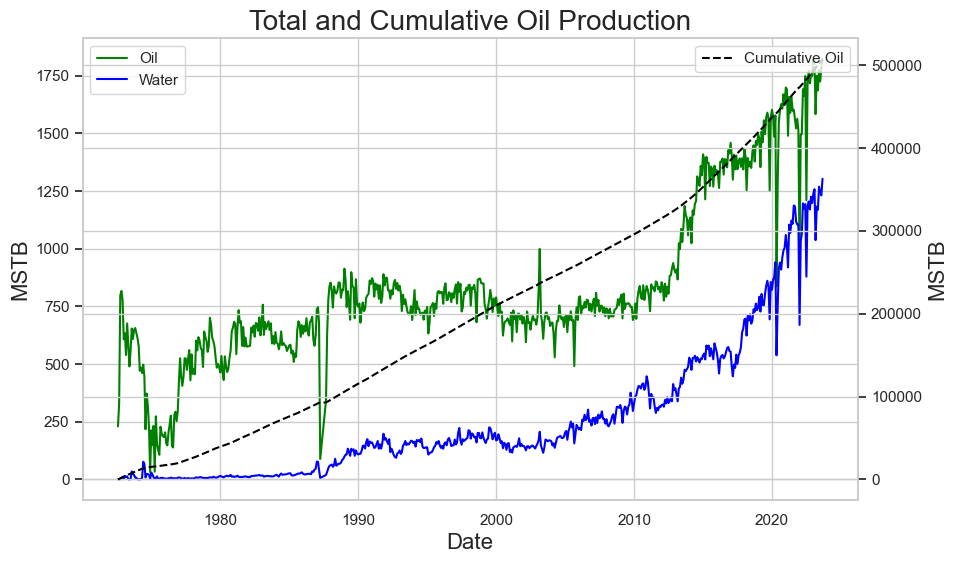

In [55]:
# change format date
df_mensual_Ui_Ti_temp['FECHA'] = pd.to_datetime(df_mensual_Ui_Ti_temp['FECHA'], format='%m/%d/%Y')


fig, ax1 = plt.subplots(figsize=(10, 6))

# Group the data by 'FECHA' and sum the 'PETROLEO' values for oil production
df_sum_petroleo = df_mensual_Ui_Ti_temp.groupby('FECHA')['PETROLEO'].sum().reset_index()
# Group the data by 'FECHA' and sum the 'AGUA' values for water production
df_sum_agua = df_mensual_Ui_Ti_temp.groupby('FECHA')['AGUA'].sum().reset_index()

# Plot the oil and water production on the primary y-axis
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('MSTB', fontsize=16)
ax1.plot(df_sum_petroleo['FECHA'], df_sum_petroleo['PETROLEO']/1000, label='Oil', color='green', linestyle='-')
ax1.plot(df_sum_agua['FECHA'], df_sum_agua['AGUA']/1000, label='Water', color='blue', linestyle='-')

ax1.tick_params(axis='y')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create a secondary y-axis for the cumulative oil production
ax2 = ax1.twinx()
ax2.set_ylabel('MSTB', fontsize=16)  # we already handled the x-label with ax1
ax2.plot(df_mensual_Ui_Ti_temp.groupby('FECHA')['PETROLEO'].sum().cumsum()/1000, color='black', label='Cumulative Oil', linestyle='--')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')
ax2.grid(True)

plt.title('Total and Cumulative Oil Production', fontsize=20)
plt.show()

C:\Users\brand\AppData\Local\Temp\ipykernel_14912\4126056474.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(yticklabels=[f'{int(y/1000)}' for y in ax.get_yticks()])


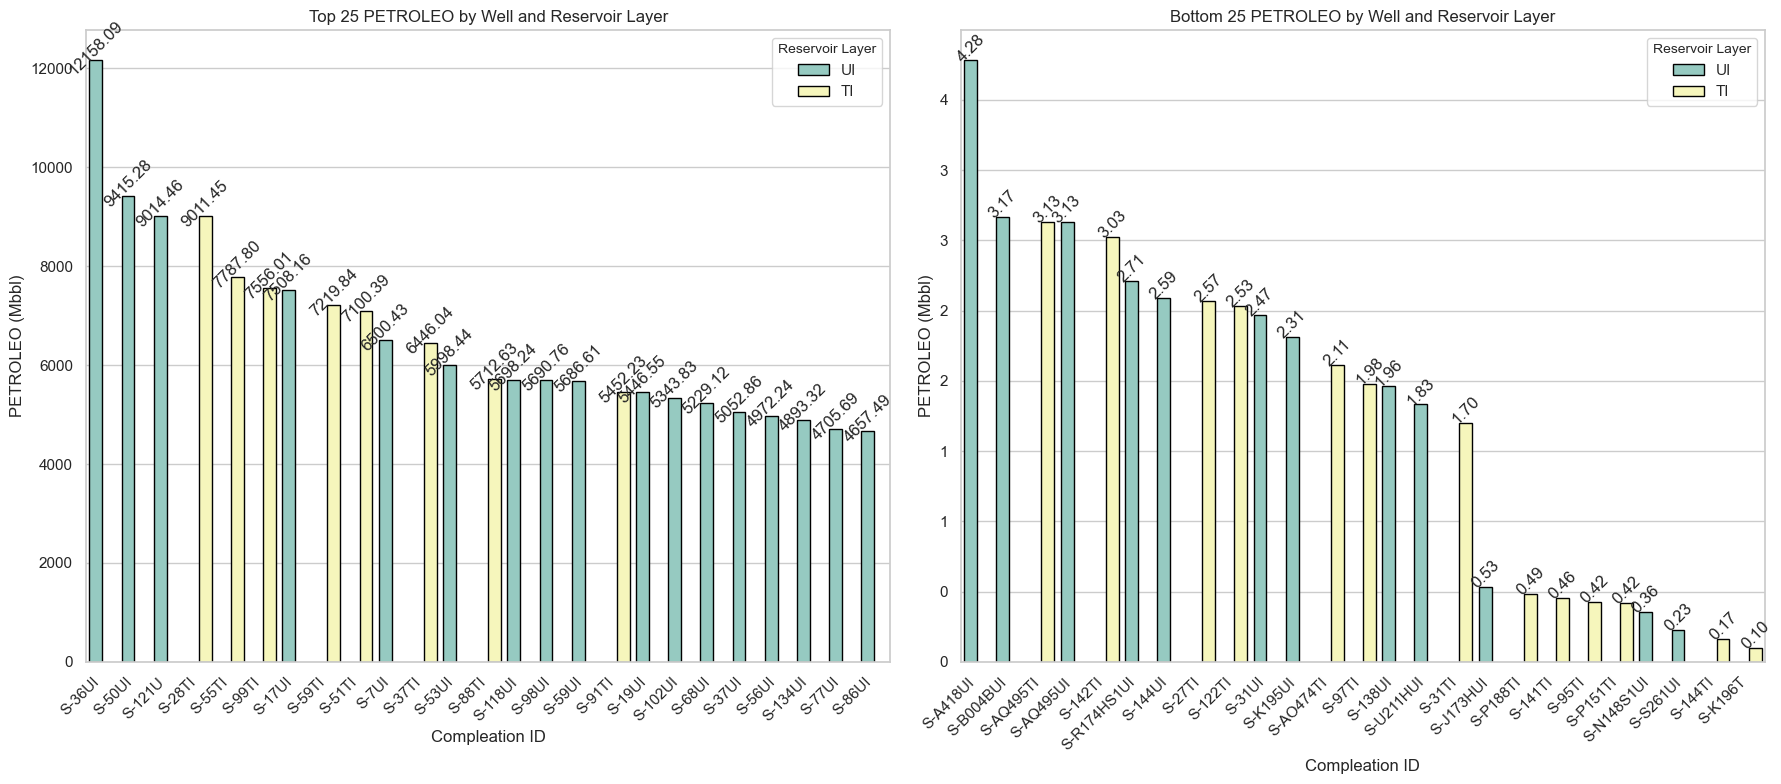

In [56]:
# Accumulated oil production
plot_top_and_bottom_n(result_prod, 'PETROLEO', n=25)

C:\Users\brand\AppData\Local\Temp\ipykernel_14912\4126056474.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(yticklabels=[f'{int(y/1000)}' for y in ax.get_yticks()])


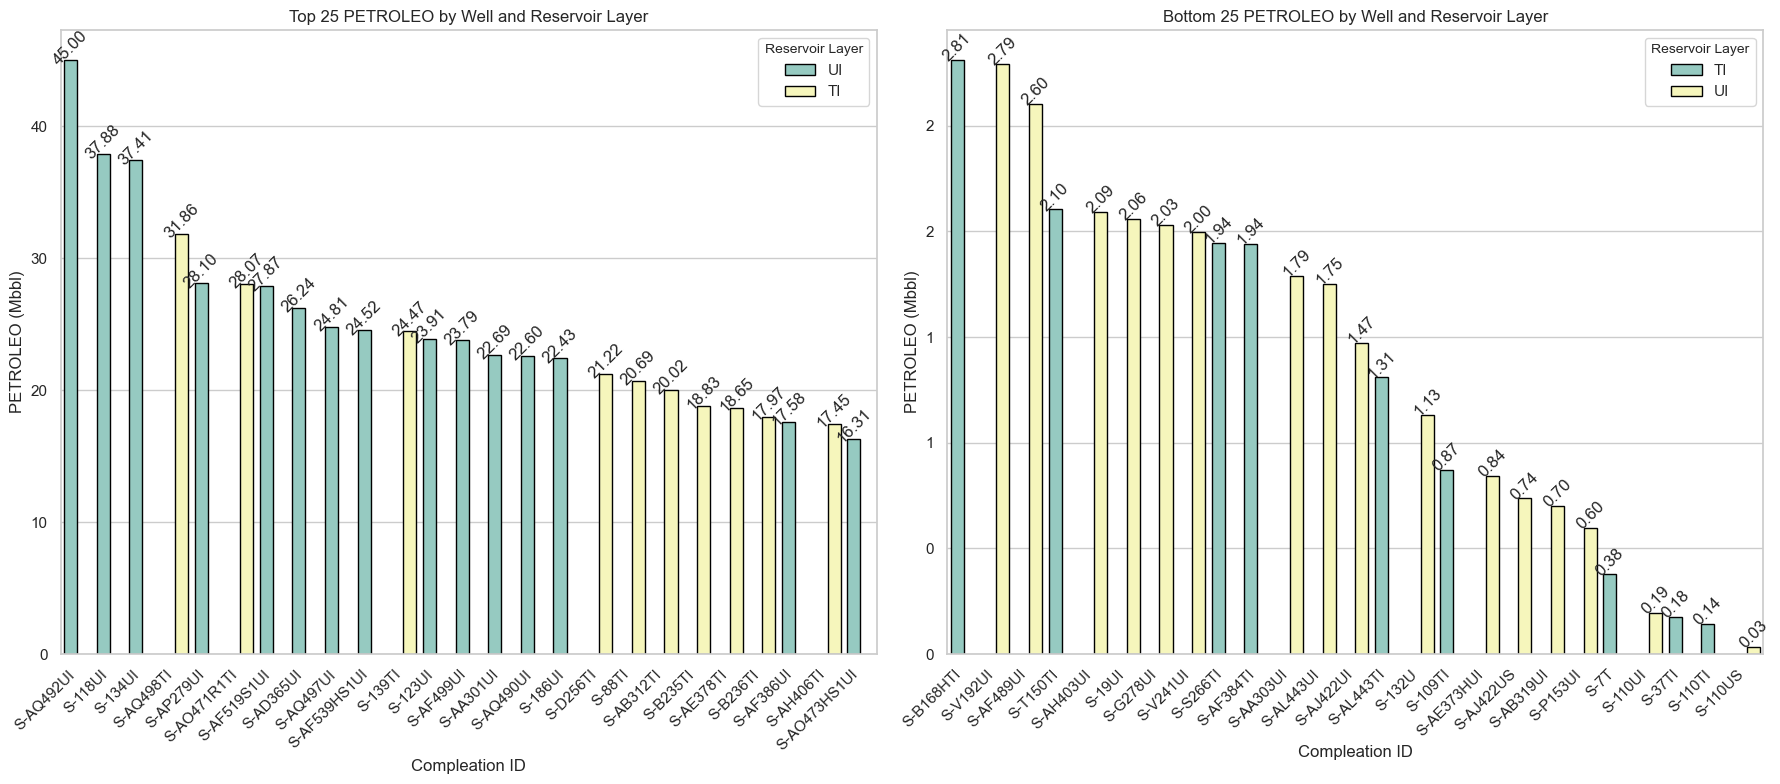

In [57]:
# Production monthly
df_mensual_Ui_Ti_plot = df_mensual_Ui_Ti_temp.assign(FECHA=pd.to_datetime(df_mensual_Ui_Ti_temp['FECHA'])).query('FECHA == FECHA.max()')
plot_top_and_bottom_n(df_mensual_Ui_Ti_plot, 'PETROLEO', n=25)

C:\Users\brand\AppData\Local\Temp\ipykernel_14912\4163036820.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set(yticklabels=[f'{int(y/1000)}' for y in bar_plot.get_yticks()])


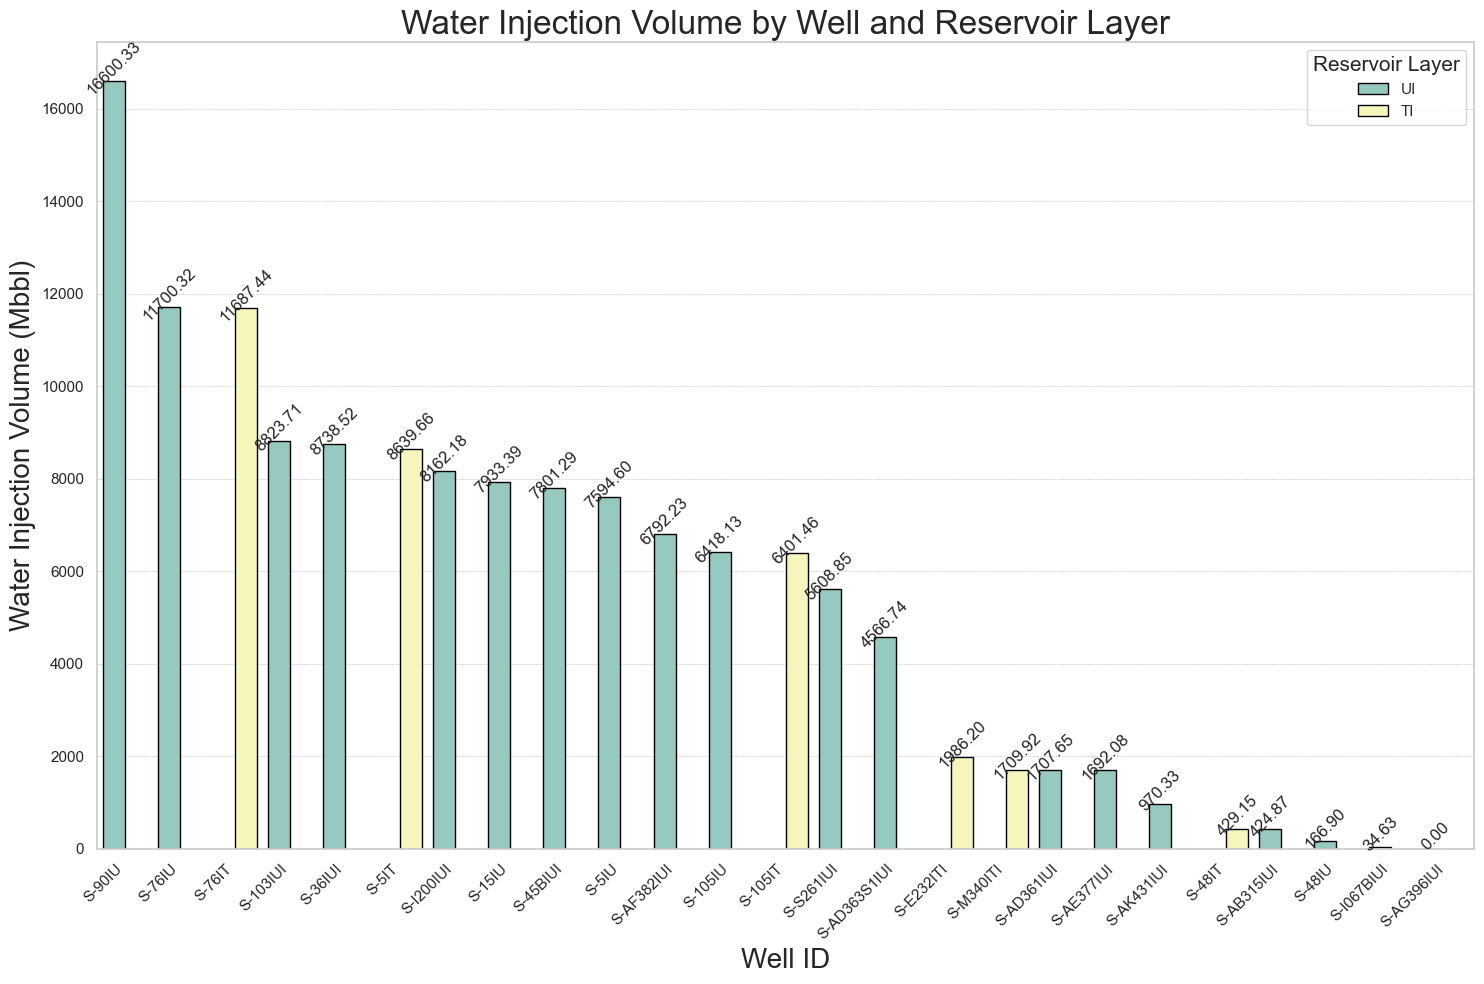

In [58]:
# Sort the DataFrame by 'WATER_INJ_VOL' in descending order
result_sorted = result_inj.sort_values(by='WATER_INJ_VOL', ascending=False)

# Set the figure size
plt.figure(figsize=(15, 10))

# Create a bar plot
bar_plot = sns.barplot(data=result_sorted, x='WELLBORE_ID', y='WATER_INJ_VOL', hue='CAPA', palette="Set3", edgecolor='black')

# Set the title and labels
plt.title('Water Injection Volume by Well and Reservoir Layer', fontsize=24)
plt.xlabel('Well ID', fontsize=20)
plt.ylabel('Water Injection Volume (Mbbl)', fontsize=20)

# Format the y-axis labels
bar_plot.set(yticklabels=[f'{int(y/1000)}' for y in bar_plot.get_yticks()])

# Add a grid
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Add a legend
bar_plot.legend(title='Reservoir Layer', title_fontsize='15', loc='upper right')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add annotations to the bars with rotation
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(format(height / 1000, '.2f'), 
                      (p.get_x() + p.get_width() / 2., height), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points', 
                      rotation=45) # Rotate the annotations 45 degrees

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Filtered data to load in OFM

In [59]:
# Delete rows with WATER_INJ_VOL = 0 and WHP = NaN
df_iny_month_OFM = df_iny_month[~((df_iny_month['WATER_INJ_VOL'] == 0) & df_iny_month['WHP'].isnull())]
df_iny_month_OFM.drop(['INJ_TYPE'], axis=1, inplace=True)
df_iny_month_OFM.rename(columns={'UNIQUEID': 'Pozo', 'Date': 'Month', 'WATER_INJ_VOL': 'Winj', 'WHP': 'Pia_Avg'}, inplace=True)
df_iny_month_OFM.head()

C:\Users\brand\AppData\Local\Temp\ipykernel_14912\1304598637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iny_month_OFM.drop(['INJ_TYPE'], axis=1, inplace=True)
C:\Users\brand\AppData\Local\Temp\ipykernel_14912\1304598637.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iny_month_OFM.rename(columns={'UNIQUEID': 'Pozo', 'Date': 'Month', 'WATER_INJ_VOL': 'Winj', 'WHP': 'Pia_Avg'}, inplace=True)


,WELLBORE_ID,Pozo,Month,Winj,WATER_INJ_AVG,DAYS,Pia,Pia_Days,Pia_Avg,CAPA,WATER_INJ_.CUM
3,S-5IT,SCH-005IT,11/01/2009,128971.0,4299.033,30.0,0.0,0,NaN,TI,128971.0
4,S-5IT,SCH-005IT,12/01/2009,134078.0,4325.097,31.0,0.0,0,NaN,TI,263049.0
5,S-5IT,SCH-005IT,01/01/2010,137696.0,4441.806,31.0,0.0,0,NaN,TI,400745.0
6,S-5IT,SCH-005IT,02/01/2010,139108.0,4968.143,28.0,0.0,0,NaN,TI,539853.0
7,S-5IT,SCH-005IT,03/01/2010,137382.0,4431.677,31.0,0.0,0,NaN,TI,677235.0


# EVENTOS - PERFORADOS

## Notas

In [60]:
# Import the Excel file
excel_file_eventos = r'C:\Users\brand\OneDrive - Universidad Central del Ecuador\Documentos\Maestría EOR\Tesis EOR\Info EPPEC\2018_INFORMACION POZOS SACHA-EVENTOS -INTERVALOS_PAM.xlsx'

# Read the Excel file into a DataFrame
df_eventos = pd.read_excel(excel_file_eventos, sheet_name='POZOS EVENTOS', skiprows=6)

df_eventos.head()

,BLOQUE,ACTIVO,POZO,EVENTO,COD EVENTO,TRABAJO,FECHA INICIO,FECHA FIN
0,B60,SA,SCHA-001,DEV DRILLING,DRL,DRL,1969-01-21,1969-02-18 00:00:00
1,B60,SA,SCHA-001,DEV COMPLETION,COM,COM,1969-02-22,1969-02-25 00:00:00
2,B60,SA,SCH-002,DEV DRILLING,DRL,DRL,1969-07-21,1969-08-22 00:00:00
3,B60,SA,SCH-002,DEV COMPLETION,COM,COM,1969-08-29,1969-08-31 00:00:00
4,B60,SA,SCH-003,DEV DRILLING,DRL,DRL,1969-09-04,1969-10-03 00:00:00


In [61]:
df_maestra.head()

,COMPLETION_LEGAL_NAME,WELL_LEGAL_NAME,WELLBORE_ID,COMPLETION_COORDINATE_X,COMPLETION_COORDINATE_Y,RSVR_NAME,FIELD,CURR_STATUS,POZO_ID
0,SCH-002BTI,SCH-002B,S-2BTI,289935.8200,9.955795e+06,TI,SCHS,Cerrado,S-2B
1,SCH-002BUI,SCH-002B,S-2BUI,289935.8200,9.955795e+06,UI,SCHS,Abandonado,S-2B
2,SCH-002TI,SCH-002,S-2TI,289933.0700,9.955781e+06,TI,SCHS,Abandonado,S-2
3,SCH-002UI,SCH-002,S-2UI,289933.0700,9.955781e+06,UI,SCHS,Abandonado,S-2
4,SCH-003TI,SCH-003,S-3TI,295091.5183,9.968342e+06,TI,SCHN1,Cerrado,S-3


In [62]:
# Generate a merge to change the name of the wells
df_eventos = pd.merge(df_eventos[['POZO', 'FECHA FIN', 'COD EVENTO', 'EVENTO']], df_maestra[['WELL_LEGAL_NAME', 'WELLBORE_ID']],
                    left_on='POZO', right_on='WELL_LEGAL_NAME', how = 'inner')

# Water production wells from report to 11/2023
well_water_prod = ['SCHAA-306', 'SCHAD-366', 'SCHAE-374', 'SCHAF-380', 'SCHAB-318', 'SCHAK-432', 'SCHE-166']

# if the well is nan in WELLBORE_ID column, then put the name of the well from POZO, just in the wells which are in well_water_prod list
df_eventos['WELLBORE_ID'] = np.where(df_eventos['WELLBORE_ID'].isnull() & df_eventos['POZO'].isin(
                        well_water_prod), df_eventos['POZO'], df_eventos['WELLBORE_ID'])

# dhange the 'Fecha' column to datetime format consider the examnple 1969-02-18 00:00:00
df_eventos['FECHA FIN'] = pd.to_datetime(df_eventos['FECHA FIN'], errors='coerce')

# change the format of the date
df_eventos['FECHA FIN'] = df_eventos['FECHA FIN'].dt.strftime('%m/%d/%Y')

# change the name of the wells to desired name format
# df_eventos['WELLBORE_ID'] = df_eventos['WELLBORE_ID'].replace(
#                                 {'SCHAA-306': 'S-AA306', 'SCHAD-366': 'S-AD366', 'SCHAE-374': 'S-AE374', 'SCHAF-380': 'S-AF380',
#                                 'SCHAB-318': 'S-AB318', 'SCHAK-432': 'S-AK432', 'SCHE-166': 'S-E166'})

# if nan in WELLBORE_ID column, delete the row
# df_eventos = df_eventos[~df_eventos['WELLBORE_ID'].isnull()]

# Put in the desired format
df_eventos = df_eventos[['WELLBORE_ID', 'FECHA FIN', 'COD EVENTO', 'EVENTO']]
df_eventos.rename(columns={'WELLBORE_ID': 'Pozo', 'FECHA FIN': 'Fecha',
                        'COD EVENTO': 'Categoría', 'EVENTO': 'Dato'}, inplace=True)

df_eventos.head()

,Pozo,Fecha,Categoría,Dato
0,S-A001U,02/18/1969,DRL,DEV DRILLING
1,S-A001UI,02/18/1969,DRL,DEV DRILLING
2,S-A001U,02/25/1969,COM,DEV COMPLETION
3,S-A001UI,02/25/1969,COM,DEV COMPLETION
4,S-A001U,05/05/1973,WKO,WORKOVER


## Perforados

In [63]:
# Import the Excel file
excel_file_perf = r'C:\Users\brand\OneDrive - Universidad Central del Ecuador\Documentos\Maestría EOR\Tesis EOR\Info EPPEC\NUEVA INFORMACIÓN 06112023\PRF-SA-RPR-231108-INTERVALOS SACHA.xlsx'

# Read the Excel file into a DataFrame
df_perf = pd.read_excel(excel_file_perf, sheet_name='INTERVALOS CAÑONEADOS', skiprows=13)

df_perf.head()

,BLOQUE,CAMPO,ACTIVO,NOMBRE LARGO,POZO,WELLBORE,FECHA CAÑONEO,Top MD (ft),Btm MD (ft),RAZON,ESTATUS,ARENA
0,B60,SACHA,SA,SACHA-003,SCH-003,SCH-003,1969-10-08,9730.0,9737.0,PRODUCTION,OPEN,"ARENA ""T"""
1,B60,SACHA,SA,SACHA-003,SCH-003,SCH-003,1969-10-08,9954.0,9982.0,PRODUCTION,OPEN,HOLLIN INFERIOR
2,B60,SACHA,SA,SACHA-003,SCH-003,SCH-003,1969-10-08,9740.0,9746.0,PRODUCTION,OPEN,"ARENA ""T"""
3,B60,SACHA,SA,SACHA-003,SCH-003,SCH-003,1969-10-08,9935.0,9939.0,PRODUCTION,OPEN,HOLLIN INFERIOR
4,B60,SACHA,SA,SACHA-003,SCH-003,SCH-003,1969-10-08,9940.0,9952.0,PRODUCTION,OPEN,HOLLIN INFERIOR


In [64]:
# Generate conditions to find the names of the layers are included
condition_Ui = df_perf['ARENA'].str.contains('U S|"US"|Ui|UI|ARENA U|U I|"U"|Lower U', case=False, na=False) # & ~df_perf['ARENA'].str.contains('"U" SU|U SU', case=False, na=False)
condition_Ti = df_perf['ARENA'].str.contains('"TS"|A "T"|T S|"Ti"|Ti|TI|A T|T I|Lower T|main T', case=False, na=False) # & ~df_perf['ARENA'].str.contains('"T" SU|T SU', case=False, na=False)
condition_H = df_perf['ARENA'].str.contains('HOLLIN|HOLLÍN|HI|ARENA H|A "H"', case=False, na=False)

# Replace the values in ARENA column at de desired format
df_perf['ARENA 2'] = np.where(condition_Ui, 'UI', df_perf['ARENA'])
df_perf['ARENA 2'] = np.where(condition_Ti, 'TI', df_perf['ARENA 2'])
df_perf['ARENA 2'] = np.where(condition_H, 'H', df_perf['ARENA 2'])

df_perf.head()

,BLOQUE,CAMPO,ACTIVO,NOMBRE LARGO,POZO,WELLBORE,FECHA CAÑONEO,Top MD (ft),Btm MD (ft),RAZON,ESTATUS,ARENA,ARENA 2
0,B60,SACHA,SA,SACHA-003,SCH-003,SCH-003,1969-10-08,9730.0,9737.0,PRODUCTION,OPEN,"ARENA ""T""",TI
1,B60,SACHA,SA,SACHA-003,SCH-003,SCH-003,1969-10-08,9954.0,9982.0,PRODUCTION,OPEN,HOLLIN INFERIOR,H
2,B60,SACHA,SA,SACHA-003,SCH-003,SCH-003,1969-10-08,9740.0,9746.0,PRODUCTION,OPEN,"ARENA ""T""",TI
3,B60,SACHA,SA,SACHA-003,SCH-003,SCH-003,1969-10-08,9935.0,9939.0,PRODUCTION,OPEN,HOLLIN INFERIOR,H
4,B60,SACHA,SA,SACHA-003,SCH-003,SCH-003,1969-10-08,9940.0,9952.0,PRODUCTION,OPEN,HOLLIN INFERIOR,H


In [65]:
# Generate a merge to change the name of the wells
df_perf = pd.merge(df_perf[['WELLBORE', 'FECHA CAÑONEO', 'Top MD (ft)', 'Btm MD (ft)', 'RAZON', 'ESTATUS', 'ARENA', 'ARENA 2']], df_maestra[
                        ['WELLBORE_ID', 'COMPLETION_LEGAL_NAME', 'WELL_LEGAL_NAME', 'RSVR_NAME']],
                    left_on=['WELLBORE', 'ARENA 2'], right_on=['WELL_LEGAL_NAME', 'RSVR_NAME'], how = 'inner') 
df_perf.head()

,WELLBORE,FECHA CAÑONEO,Top MD (ft),Btm MD (ft),RAZON,ESTATUS,ARENA,ARENA 2,WELLBORE_ID,COMPLETION_LEGAL_NAME,WELL_LEGAL_NAME,RSVR_NAME
0,SCH-003,1969-10-08,9730.0,9737.0,PRODUCTION,OPEN,"ARENA ""T""",TI,S-3TI,SCH-003TI,SCH-003,TI
1,SCH-003,1969-10-08,9740.0,9746.0,PRODUCTION,OPEN,"ARENA ""T""",TI,S-3TI,SCH-003TI,SCH-003,TI
2,SCH-003,1969-10-08,9750.0,9756.0,PRODUCTION,OPEN,"ARENA ""T""",TI,S-3TI,SCH-003TI,SCH-003,TI
3,SCH-003,1994-12-17,9730.0,9737.0,PRODUCTION,OPEN,"ARENA ""T""",TI,S-3TI,SCH-003TI,SCH-003,TI
4,SCH-003,1994-12-17,9740.0,9746.0,PRODUCTION,OPEN,"ARENA ""T""",TI,S-3TI,SCH-003TI,SCH-003,TI


In [66]:
# dame una lista de pozos de df_maestra que no estan en df_perf_2
completions_not_found = [pozo for pozo in df_maestra['COMPLETION_LEGAL_NAME'].unique() if pozo not in df_perf['COMPLETION_LEGAL_NAME'].unique()]
print(completions_not_found)

['SCH-002TI', 'SCH-002UI', 'SCH-012T', 'SCH-012TI', 'SCH-012UI', 'SCH-012US', 'SCH-015IU', 'SCH-015UI', 'SCH-022TI', 'SCH-022UI', 'SCH-024TI', 'SCH-024UI', 'SCH-025U', 'SCH-025UI', 'SCH-026U', 'SCH-026UI', 'SCH-027TI', 'SCH-027UI', 'SCH-028T', 'SCH-028TI', 'SCH-028UI', 'SCH-029TI', 'SCH-029UI', 'SCH-034T', 'SCH-034TI', 'SCH-034UI', 'SCH-035TI', 'SCH-035UI', 'SCH-039TI', 'SCH-039UI', 'SCH-040TI', 'SCH-040UI', 'SCH-048IT', 'SCH-048IU', 'SCH-052UI', 'SCH-054TI', 'SCH-054UI', 'SCH-056U', 'SCH-056UI', 'SCH-057UI', 'SCH-061TI', 'SCH-064TI', 'SCH-064UI', 'SCH-066UI', 'SCH-071U', 'SCH-071UI', 'SCH-074TI', 'SCH-074UI', 'SCH-075TI', 'SCH-075U', 'SCH-075UI', 'SCH-076IT', 'SCH-076IU', 'SCH-078TI', 'SCH-078UI', 'SCH-083T', 'SCH-083UI', 'SCH-085UI', 'SCH-089UI', 'SCH-090IU', 'SCH-090UI', 'SCH-092U', 'SCH-092UI', 'SCH-095TI', 'SCH-097TI', 'SCH-097UI', 'SCH-105IT', 'SCH-105IU', 'SCH-107TI', 'SCH-107UI', 'SCH-112UI', 'SCH-113U', 'SCH-113UI', 'SCH-116T', 'SCH-116TI', 'SCH-116UI', 'SCH-117UI', 'SCH-122TI

In [67]:
print(r'Number of completions in Maestra: {}'.format(df_maestra['COMPLETION_LEGAL_NAME'].nunique()))
print(r'Completions with perforation: {}'.format(df_perf['COMPLETION_LEGAL_NAME'].nunique()))
print(r'Number of completions not found: {}'.format(len(completions_not_found)))

Number of completions in Maestra: 560
Completions with perforation: 434
Number of completions not found: 126


In [68]:
# Change the punzados types
df_perf['RAZON'] = df_perf['RAZON'].replace(
                                {'PRODUCTION': 'Producción', 'CEMENT SQUEEZE': 'SQZ', 'PRODUCTION  "TI"': 'PRODUCTION',
                                'INJECTION' : 'Inyección','ARENA INYECTORA': 'INJECTION', 'PRODUCTION  "UIf"': 'PRODUCTION', 'PRODUCTION  "UI"': 'PRODUCTION'})

# generate a copy of the df_perf DataFrame
df_perf_original = df_perf.copy()

df_perf['FECHA CAÑONEO'] = df_perf['FECHA CAÑONEO'].dt.strftime('%m/%d/%Y')

# Put in the desired format
# TODO: check if the columns are correct and their names
df_perf = df_perf[['WELLBORE_ID', 'FECHA CAÑONEO', 'Top MD (ft)', 'Btm MD (ft)', 'RAZON', 'COMPLETION_LEGAL_NAME']].rename(
                columns={'WELLBORE_ID': 'POZO', 'COMPLETION_LEGAL_NAME': 'NOMBRE COMPLETO', 'FECHA CAÑONEO': 'FECHA',
                        'Top MD (ft)': 'TOPE', 'Btm MD (ft)': 'BASE', 'RAZON': 'Operación'})

# delete the rows with the values nan 
df_perf = df_perf[(~df_perf['BASE'].isnull()) & (df_perf['BASE'] != 0)]

df_perf.head()

,POZO,FECHA,TOPE,BASE,Operación,NOMBRE COMPLETO
0,S-3TI,10/08/1969,9730.0,9737.0,Producción,SCH-003TI
1,S-3TI,10/08/1969,9740.0,9746.0,Producción,SCH-003TI
2,S-3TI,10/08/1969,9750.0,9756.0,Producción,SCH-003TI
3,S-3TI,12/17/1994,9730.0,9737.0,Producción,SCH-003TI
4,S-3TI,12/17/1994,9740.0,9746.0,Producción,SCH-003TI


In [69]:
df_perf.describe()

,TOPE,BASE
count,1484.000000,1484.000000
mean,9803.422978,9821.210040
std,522.069225,522.776024
min,892.200000,892.200000
25%,9478.000000,9505.750000
50%,9669.000000,9678.500000
75%,10056.500000,10075.750000
max,11712.000000,11745.000000


## Notas 2

In [70]:
df_maestra.head()

,COMPLETION_LEGAL_NAME,WELL_LEGAL_NAME,WELLBORE_ID,COMPLETION_COORDINATE_X,COMPLETION_COORDINATE_Y,RSVR_NAME,FIELD,CURR_STATUS,POZO_ID
0,SCH-002BTI,SCH-002B,S-2BTI,289935.8200,9.955795e+06,TI,SCHS,Cerrado,S-2B
1,SCH-002BUI,SCH-002B,S-2BUI,289935.8200,9.955795e+06,UI,SCHS,Abandonado,S-2B
2,SCH-002TI,SCH-002,S-2TI,289933.0700,9.955781e+06,TI,SCHS,Abandonado,S-2
3,SCH-002UI,SCH-002,S-2UI,289933.0700,9.955781e+06,UI,SCHS,Abandonado,S-2
4,SCH-003TI,SCH-003,S-3TI,295091.5183,9.968342e+06,TI,SCHN1,Cerrado,S-3


In [71]:
# Find the last month of production for each well
# df_mensual_Ui_Ti_temp = df_mensual_Ui_Ti.copy()

#  change format of the date
df_mensual_Ui_Ti_temp['FECHA'] = pd.to_datetime(df_mensual_Ui_Ti_temp['FECHA'], errors='coerce')

last_month = df_mensual_Ui_Ti_temp.groupby('IDENTIFICADOR')['FECHA'].idxmax()

# Filter rows corresponding to the last month of each well
df_notas_prod = df_mensual_Ui_Ti_temp.loc[last_month]

# Calculate the average of PETROLEO for the last month divided by the number of TIEMPO_EFECTIVO of the month
df_notas_prod['Qo [bopd]'] = df_notas_prod['PETROLEO'] / df_notas_prod['TIEMPO_EFECTIVO']
df_notas_prod['Qt [bfpd]'] = (df_notas_prod['AGUA'] + df_notas_prod['PETROLEO']) / df_notas_prod['TIEMPO_EFECTIVO']

# Generate a merge to have the reservoir name
df_notas_prod = pd.merge(df_notas_prod[['IDENTIFICADOR', 'NOMBRE_COMPLETO', 'FECHA', 'Qo [bopd]', 'Qt [bfpd]', 'OIL_cum']], df_maestra[['COMPLETION_LEGAL_NAME', 'RSVR_NAME']],
                    left_on='NOMBRE_COMPLETO', right_on='COMPLETION_LEGAL_NAME', how = 'inner')
# Put in the desired format
df_notas_prod.rename(columns={'IDENTIFICADOR': 'WELLBORE_ID', 'NOMBRE_COMPLETO': 'Completion', 'OIL_cum': 'Np [Bls]'}, inplace=True)

df_notas_prod.head()

,WELLBORE_ID,Completion,FECHA,Qo [bopd],Qt [bfpd],Np [Bls],COMPLETION_LEGAL_NAME,RSVR_NAME
0,S-101U,SCH-101U,2023-08-31,258.430968,812.237419,1583995.258,SCH-101U,UI
1,S-102TI,SCH-102TI,2009-10-31,137.243226,336.380323,3067783.782,SCH-102TI,TI
2,S-102UI,SCH-102UI,2023-08-31,171.765290,471.991097,5343834.543,SCH-102UI,UI
3,S-103UI,SCH-103UI,2017-10-31,31.619647,332.560824,484552.516,SCH-103UI,UI
4,S-104TI,SCH-104TI,2002-06-30,81.720000,392.880000,9256.680,SCH-104TI,TI


In [72]:
# Column to determine if the well is producing
df_notas_prod['Estado'] = np.where(df_notas_prod['Qt [bfpd]'] > 0, 'SI', 'NO')
df_notas_prod.head()

,WELLBORE_ID,Completion,FECHA,Qo [bopd],Qt [bfpd],Np [Bls],COMPLETION_LEGAL_NAME,RSVR_NAME,Estado
0,S-101U,SCH-101U,2023-08-31,258.430968,812.237419,1583995.258,SCH-101U,UI,SI
1,S-102TI,SCH-102TI,2009-10-31,137.243226,336.380323,3067783.782,SCH-102TI,TI,SI
2,S-102UI,SCH-102UI,2023-08-31,171.765290,471.991097,5343834.543,SCH-102UI,UI,SI
3,S-103UI,SCH-103UI,2017-10-31,31.619647,332.560824,484552.516,SCH-103UI,UI,SI
4,S-104TI,SCH-104TI,2002-06-30,81.720000,392.880000,9256.680,SCH-104TI,TI,SI


In [73]:
df_iny_month_copy = df_iny_month.copy()
df_iny_month_copy['Date'] = pd.to_datetime(df_iny_month_copy['Date'], format='%m/%d/%Y')

In [74]:
# Find the last month of production for each well
last_month = df_iny_month_copy.groupby('UNIQUEID')['Date'].idxmax()

# Filter rows corresponding to the last month of each well
df_notas_iny = df_iny_month_copy.loc[last_month]

# Calculate the average of OILP for the last month divided by the number of days of the month
df_notas_iny['W [bwpd]'] = df_notas_iny['WATER_INJ_VOL'] / df_notas_iny['DAYS']

# Generate a merge to have the reservoir name
df_notas_iny = pd.merge(df_notas_iny[['WELLBORE_ID', 'UNIQUEID', 'Date', 'WATER_INJ_VOL', 'W [bwpd]', 'WATER_INJ_.CUM']], df_maestra[['COMPLETION_LEGAL_NAME', 'RSVR_NAME']],
                    left_on='UNIQUEID', right_on='COMPLETION_LEGAL_NAME', how = 'inner')

# Put in the desired format
df_notas_iny.rename(columns={'UNIQUEID': 'Completion', 'Date': 'FECHA', 'OIL_cum': 'Wp [Bls]', 'WATER_INJ_.CUM': 'Wp [Bls]'}, inplace=True)

df_notas_iny.head()

,WELLBORE_ID,Completion,FECHA,WATER_INJ_VOL,W [bwpd],Wp [Bls],COMPLETION_LEGAL_NAME,RSVR_NAME
0,S-5IT,SCH-005IT,2018-10-01,0.0,0.000000,8639658.0,SCH-005IT,TI
1,S-5IU,SCH-005IU,2018-06-01,27437.0,914.566667,7594596.0,SCH-005IU,UI
2,S-15IU,SCH-015IU,2023-09-01,1451.0,1451.000000,7933394.0,SCH-015IU,UI
3,S-36IUI,SCH-036IUI,2023-09-01,5248.0,5248.000000,8738520.0,SCH-036IUI,UI
4,S-45BIUI,SCH-045BIUI,2023-09-01,6151.0,6151.000000,7801290.0,SCH-045BIUI,UI


In [75]:
# Column to determine if the completion is producing
df_notas_iny['Estado'] = np.where(df_notas_iny['W [bwpd]'] > 0, 'SI', 'NO')
df_notas_iny.head()

,WELLBORE_ID,Completion,FECHA,WATER_INJ_VOL,W [bwpd],Wp [Bls],COMPLETION_LEGAL_NAME,RSVR_NAME,Estado
0,S-5IT,SCH-005IT,2018-10-01,0.0,0.000000,8639658.0,SCH-005IT,TI,NO
1,S-5IU,SCH-005IU,2018-06-01,27437.0,914.566667,7594596.0,SCH-005IU,UI,SI
2,S-15IU,SCH-015IU,2023-09-01,1451.0,1451.000000,7933394.0,SCH-015IU,UI,SI
3,S-36IUI,SCH-036IUI,2023-09-01,5248.0,5248.000000,8738520.0,SCH-036IUI,UI,SI
4,S-45BIUI,SCH-045BIUI,2023-09-01,6151.0,6151.000000,7801290.0,SCH-045BIUI,UI,SI


In [76]:
# Append the DataFrames
df_notas_2 = df_notas_prod[['WELLBORE_ID', 'FECHA', 'Estado', 'RSVR_NAME']].append(
                            df_notas_iny[['WELLBORE_ID', 'FECHA', 'Estado', 'RSVR_NAME']], ignore_index=True)

# Change the format of the dates
df_notas_2['FECHA'] = df_notas_2['FECHA'].dt.strftime('%m/%d/%Y')

df_notas_2.rename(columns={'WELLBORE_ID': 'Pozo', 'FECHA': 'Fecha'}, inplace=True)
df_notas_2.head()

C:\Users\brand\AppData\Local\Temp\ipykernel_14912\3434568558.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_notas_2 = df_notas_prod[['WELLBORE_ID', 'FECHA', 'Estado', 'RSVR_NAME']].append(


,Pozo,Fecha,Estado,RSVR_NAME
0,S-101U,08/31/2023,SI,UI
1,S-102TI,10/31/2009,SI,TI
2,S-102UI,08/31/2023,SI,UI
3,S-103UI,10/31/2017,SI,UI
4,S-104TI,06/30/2002,SI,TI


In [77]:
df_maestra.head()

,COMPLETION_LEGAL_NAME,WELL_LEGAL_NAME,WELLBORE_ID,COMPLETION_COORDINATE_X,COMPLETION_COORDINATE_Y,RSVR_NAME,FIELD,CURR_STATUS,POZO_ID
0,SCH-002BTI,SCH-002B,S-2BTI,289935.8200,9.955795e+06,TI,SCHS,Cerrado,S-2B
1,SCH-002BUI,SCH-002B,S-2BUI,289935.8200,9.955795e+06,UI,SCHS,Abandonado,S-2B
2,SCH-002TI,SCH-002,S-2TI,289933.0700,9.955781e+06,TI,SCHS,Abandonado,S-2
3,SCH-002UI,SCH-002,S-2UI,289933.0700,9.955781e+06,UI,SCHS,Abandonado,S-2
4,SCH-003TI,SCH-003,S-3TI,295091.5183,9.968342e+06,TI,SCHN1,Cerrado,S-3


In [78]:
# Compleations which don't have production or injection history
completions_not_found = [pozo for pozo in df_maestra['WELLBORE_ID'].unique() if pozo not in df_notas_2['Pozo'].unique()]
print(completions_not_found)

['S-2TI', 'S-7U', 'S-8U', 'S-9T', 'S-12T', 'S-14T', 'S-17U', 'S-19U', 'S-25U', 'S-26U', 'S-28T', 'S-32T', 'S-34T', 'S-37T', 'S-46U', 'S-51T', 'S-53U', 'S-56U', 'S-71U', 'S-72U', 'S-75U', 'S-77U', 'S-80T', 'S-82U', 'S-88T', 'S-92U', 'S-93U', 'S-98U', 'S-102U', 'S-104U', 'S-113U', 'S-116T', 'S-118U', 'S-129U', 'S-131T', 'S-132TI', 'S-133T', 'S-133U', 'S-134U', 'S-139T', 'S-157T', 'S-A001U', 'S-A409TI', 'S-A417UI', 'S-AC351TI', 'S-AD360U', 'S-AD361U', 'S-AD361UI', 'S-AD363S1UI', 'S-AF382U', 'S-AG394UI', 'S-AI415UI', 'S-AK432UI', 'S-AM455UI', 'S-AM541TI', 'S-AP484UI', 'S-AQ491TI', 'S-AQ494UI', 'S-I067BU', 'S-L111T', 'S-N148UI', 'S-O149T', 'S-O223U', 'S-R175HTI', 'S-S177TI', 'S-S177U', 'S-S263TI', 'S-S264U', 'S-S266T', 'S-V217U', 'S-V240UI', 'S-X272TI', 'S-Y283UI', 'S-Z291US']


In [79]:
print(r'Number of completions in Maestra: {}'.format(df_maestra['COMPLETION_LEGAL_NAME'].nunique()))
print(r'Number of completions in production: {}'.format(df_mensual_Ui_Ti['IDENTIFICADOR'].nunique()))
print(r'Number of completions in injection: {}'.format(df_iny_month['WELLBORE_ID'].nunique()))
print(r'Number of completions that dont have production or injection history: {}'.format(len(completions_not_found)))

Number of completions in Maestra: 560
Number of completions in production: 461
Number of completions in injection: 25
Number of completions that dont have production or injection history: 74


# ESTADOS CAPA

In [80]:
df_perf_original.head()

,WELLBORE,FECHA CAÑONEO,Top MD (ft),Btm MD (ft),RAZON,ESTATUS,ARENA,ARENA 2,WELLBORE_ID,COMPLETION_LEGAL_NAME,WELL_LEGAL_NAME,RSVR_NAME
0,SCH-003,1969-10-08,9730.0,9737.0,Producción,OPEN,"ARENA ""T""",TI,S-3TI,SCH-003TI,SCH-003,TI
1,SCH-003,1969-10-08,9740.0,9746.0,Producción,OPEN,"ARENA ""T""",TI,S-3TI,SCH-003TI,SCH-003,TI
2,SCH-003,1969-10-08,9750.0,9756.0,Producción,OPEN,"ARENA ""T""",TI,S-3TI,SCH-003TI,SCH-003,TI
3,SCH-003,1994-12-17,9730.0,9737.0,Producción,OPEN,"ARENA ""T""",TI,S-3TI,SCH-003TI,SCH-003,TI
4,SCH-003,1994-12-17,9740.0,9746.0,Producción,OPEN,"ARENA ""T""",TI,S-3TI,SCH-003TI,SCH-003,TI


In [81]:
# Put in the desired format
# TODO: Check the change of the names of the ARENA 2
df_layer_status = df_perf_original[['WELLBORE', 'ARENA', 'ARENA 2', 'FECHA CAÑONEO', 'ESTATUS']].rename(
                columns={'ARENA 2': 'CAPA', 'FECHA CAÑONEO': 'FECHA', 'ESTATUS': 'ESTADO'})


# Merge with df_maestra to get the name of the completion
df_layer_status = pd.merge(df_layer_status, df_maestra[['WELLBORE_ID', 'WELL_LEGAL_NAME', 'COMPLETION_LEGAL_NAME', 'RSVR_NAME']],
                    left_on=['WELLBORE', 'CAPA'], right_on=['WELL_LEGAL_NAME', 'RSVR_NAME'], how = 'inner')

# Change the values of ESTADO column where OPEN is 1 and the others are 0
df_layer_status['ESTADO'] = np.where(df_layer_status['ESTADO'] == 'OPEN', 1, 0)

# Change the format of the dates
df_layer_status['FECHA'] = df_layer_status['FECHA'].dt.strftime('%m/%d/%Y')

# keep just rows where the CAPA column is TI or UI
df_layer_status = df_layer_status[df_layer_status['CAPA'].isin(['TI', 'UI'])]

# TODO: Delete the rows with nan in COMPLETION_LEGAL_NAME column
# df_layer_status = df_layer_status[~df_layer_status['COMPLETION_LEGAL_NAME'].isnull()]

df_layer_status = df_layer_status[['WELLBORE_ID', 'CAPA', 'FECHA', 'ESTADO', 'COMPLETION_LEGAL_NAME', 'WELLBORE']].rename(
                columns={'WELLBORE_ID': 'Pozo', 'CAPA': 'Capa', 'FECHA': 'Fecha', 'ESTADO': 'Estado', 'COMPLETION_LEGAL_NAME': 'NOMBRE_COMPLETO'})

df_layer_status.head()

,Pozo,Capa,Fecha,Estado,NOMBRE_COMPLETO,WELLBORE
0,S-3TI,TI,10/08/1969,1,SCH-003TI,SCH-003
1,S-3TI,TI,10/08/1969,1,SCH-003TI,SCH-003
2,S-3TI,TI,10/08/1969,1,SCH-003TI,SCH-003
3,S-3TI,TI,12/17/1994,1,SCH-003TI,SCH-003
4,S-3TI,TI,12/17/1994,1,SCH-003TI,SCH-003


# INSTALACIONES

In [82]:
import pdfplumber
import re
from collections import namedtuple


In [83]:
# pdf_file = pdfplumber.open('2017_SCHP-188 WO# 08_ZS.pdf')

In [84]:
loc_colums = ['No', 'Jts', 'Tope MD', 'Tope TVD', 'Longitud', 'OD Nom', 'Descripción']

In [85]:
# with pdfplumber.open('2017_SCHP-188 WO# 08_ZS.pdf') as pdf:
#     data = pdf.pages[0].extract_tables()
#     # data = data[0][1:]
# data

# PRUEBAS DE PRODUCCIÓN

In [86]:
df_production_test.head()

,PTYPE,COMPLETION_LEGAL_NAME,TEST_DATE,T_HRS,TEST_OIL_24,TEST_GAS_24,TEST_WAT_24,GRAV_OIL API,BSW,CASING_PRESS,...,REMARKS,TEST_PURPOSE,INYECTION_PSI,PLANT_PSI,INJECTION_VOL,INJECTION_API,RETURN_VOL,RETURN_BSW,RETURN_API,VOL_REAL
0,COMP,SCH-002BTI,2015-01-02,5.0,110.0,0.0,2.0,27.4,1.786,0.0,...,Realizar prueba de 12 horas.,A,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
1,COMP,SCH-002BTI,2015-01-05,5.0,145.0,0.0,3.0,27.4,2.027,0.0,...,None,A,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
2,COMP,SCH-002BTI,2015-01-15,5.0,145.0,0.0,3.0,27.4,2.027,0.0,...,None,A,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
3,COMP,SCH-002BTI,2015-01-20,5.0,122.0,0.0,3.0,27.4,2.400,0.0,...,None,A,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
4,COMP,SCH-002BTI,2015-01-25,5.0,120.0,0.0,2.0,27.4,1.639,0.0,...,None,A,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0


In [87]:
df_production_test.columns

Index(['PTYPE', 'COMPLETION_LEGAL_NAME', 'TEST_DATE', 'T_HRS', 'TEST_OIL_24',
       'TEST_GAS_24', 'TEST_WAT_24', 'GRAV_OIL API', 'BSW', 'CASING_PRESS',
       'PBHP', 'TUBING_PRESS', 'PIP', 'FLAP', 'SBHP', 'GAS_SP_GRAVITIY',
       'TUBING_TMP', 'PI', 'AMPS_A', 'PUMP_TMP', 'MOTOR_HZ', 'POWER_KW',
       'STAGE_COUNT', 'VOLTAGE', 'INTAKE_DEPTH', 'PUMP_TYPE', 'SALINITY',
       'REMARKS', 'TEST_PURPOSE', 'INYECTION_PSI', 'PLANT_PSI',
       'INJECTION_VOL', 'INJECTION_API', 'RETURN_VOL', 'RETURN_BSW',
       'RETURN_API', 'VOL_REAL'],
      dtype='object')

In [88]:

# TODO: check the columns we need and their names

# select the columns we need
df_production_test = df_production_test[['COMPLETION_LEGAL_NAME', 'TEST_DATE', 'TEST_OIL_24', 'TEST_WAT_24', 'BSW', 'T_HRS',
                    'TEST_GAS_24', 'CASING_PRESS', 'INTAKE_DEPTH', 'MOTOR_HZ', 'PIP', 'AMPS_A', 'PUMP_TYPE', 'GRAV_OIL API']]

# rename columns
df_production_test.rename(columns={'COMPLETION_LEGAL_NAME': 'UNIQUEID', 'TEST_DATE': 'DATE',
                        'TEST_OIL_24': 'OIL_FLOW', 'TEST_WAT_24': 'WATER_FLOW', 'BSW': 'BSW', 'T_HRS': 'DURATION',
                        'TEST_GAS_24': 'GAS_FLOW', 'CASING_PRESS': 'CHP', 'INTAKE_DEPTH': 'PUMP_DEPTH', 'MOTOR_HZ': 'Frecuency',
                        'PIP': 'PIP', 'AMPS_A': 'Amperage', 'ALS': 'PUMP_TYPE', 'GRAV_OIL API': 'OIL_GRAVITY'}, inplace=True)

df_production_test.head()

,UNIQUEID,DATE,OIL_FLOW,WATER_FLOW,BSW,DURATION,GAS_FLOW,CHP,PUMP_DEPTH,Frecuency,PIP,Amperage,PUMP_TYPE,OIL_GRAVITY
0,SCH-002BTI,2015-01-02,110.0,2.0,1.786,5.0,0.0,0.0,NaN,0.0,0.0,NaN,P23 SSD,27.4
1,SCH-002BTI,2015-01-05,145.0,3.0,2.027,5.0,0.0,0.0,NaN,0.0,0.0,NaN,P23 SSD,27.4
2,SCH-002BTI,2015-01-15,145.0,3.0,2.027,5.0,0.0,0.0,NaN,0.0,0.0,NaN,P23 SSD,27.4
3,SCH-002BTI,2015-01-20,122.0,3.0,2.400,5.0,0.0,0.0,NaN,0.0,0.0,NaN,P23 SSD,27.4
4,SCH-002BTI,2015-01-25,120.0,2.0,1.639,5.0,0.0,0.0,NaN,0.0,0.0,NaN,P23 SSD,27.4


In [89]:
df_maestra.head(3)

,COMPLETION_LEGAL_NAME,WELL_LEGAL_NAME,WELLBORE_ID,COMPLETION_COORDINATE_X,COMPLETION_COORDINATE_Y,RSVR_NAME,FIELD,CURR_STATUS,POZO_ID
0,SCH-002BTI,SCH-002B,S-2BTI,289935.82,9955795.32,TI,SCHS,Cerrado,S-2B
1,SCH-002BUI,SCH-002B,S-2BUI,289935.82,9955795.32,UI,SCHS,Abandonado,S-2B
2,SCH-002TI,SCH-002,S-2TI,289933.07,9955780.98,TI,SCHS,Abandonado,S-2


In [90]:
# merge with df_maestra to get the name of the completion
df_production_test = pd.merge(df_production_test, df_maestra[['WELLBORE_ID', 'COMPLETION_LEGAL_NAME']],
                    left_on='UNIQUEID', right_on='COMPLETION_LEGAL_NAME', how = 'inner')

df_production_test.drop(['COMPLETION_LEGAL_NAME'], axis=1, inplace=True)

# Change the format of the dates
df_production_test['DATE'] = df_production_test['DATE'].dt.strftime('%m/%d/%Y')

df_production_test = df_production_test[['WELLBORE_ID', 'UNIQUEID', 'DATE', 'OIL_FLOW', 'WATER_FLOW', 'BSW', 'DURATION', 'GAS_FLOW', 'CHP', 'PUMP_DEPTH', 'Frecuency', 'PIP', 'Amperage', 'PUMP_TYPE', 'OIL_GRAVITY']]

df_production_test.head()

,WELLBORE_ID,UNIQUEID,DATE,OIL_FLOW,WATER_FLOW,BSW,DURATION,GAS_FLOW,CHP,PUMP_DEPTH,Frecuency,PIP,Amperage,PUMP_TYPE,OIL_GRAVITY
0,S-2BTI,SCH-002BTI,01/02/2015,110.0,2.0,1.786,5.0,0.0,0.0,NaN,0.0,0.0,NaN,P23 SSD,27.4
1,S-2BTI,SCH-002BTI,01/05/2015,145.0,3.0,2.027,5.0,0.0,0.0,NaN,0.0,0.0,NaN,P23 SSD,27.4
2,S-2BTI,SCH-002BTI,01/15/2015,145.0,3.0,2.027,5.0,0.0,0.0,NaN,0.0,0.0,NaN,P23 SSD,27.4
3,S-2BTI,SCH-002BTI,01/20/2015,122.0,3.0,2.400,5.0,0.0,0.0,NaN,0.0,0.0,NaN,P23 SSD,27.4
4,S-2BTI,SCH-002BTI,01/25/2015,120.0,2.0,1.639,5.0,0.0,0.0,NaN,0.0,0.0,NaN,P23 SSD,27.4


In [91]:
df_production_test['UNIQUEID'].nunique()

258

In [92]:
df_production_test.describe().round(2)

,OIL_FLOW,WATER_FLOW,BSW,DURATION,GAS_FLOW,CHP,PUMP_DEPTH,Frecuency,PIP,Amperage,OIL_GRAVITY
count,54233.00,54233.00,54233.00,54233.00,54233.00,54157.00,45912.00,54231.00,54199.00,45884.00,54228.00
mean,307.44,203.62,27.72,6.04,76.52,24.58,8012.74,46.94,269.82,26.16,25.01
std,215.25,411.34,29.47,3.46,94.63,100.38,3379.29,36.89,365.34,16.54,4.32
min,0.00,0.00,-1.20,0.00,0.00,0.00,-1.00,0.00,0.00,0.00,0.00
25%,158.00,9.00,2.97,5.00,26.35,0.00,9102.94,0.00,0.00,19.00,22.40
50%,252.00,40.00,12.91,5.00,50.75,0.00,9287.80,54.00,232.00,26.00,26.10
75%,404.00,201.00,50.72,6.00,91.30,20.00,9504.00,60.00,404.00,33.00,28.00
max,1737.00,3615.00,100.00,24.00,3178.00,3800.00,60064.42,3200.00,10549.00,450.00,33.60


# SURVEYS

In [93]:
#  Define a function to read the survey data
def read_survey(file):
    # Initialize a variable to store the well name
    well_name = None
    
    # Open the file and extract the well name
    with open(file, 'r') as f:
        for line in f:
            if "WELL NAME:" in line:
                well_name = line.split("WELL NAME:")[1].strip()
                break

    # Initialize a variable to count header rows
    header_rows = 0

    # Open the file and determine how many header rows there are
    with open(file, 'r') as f:
        for line in f:
            if line.startswith("#"):
                header_rows += 1
            else:
                break

    # Read the data from the file, skipping the header rows
    data = pd.read_csv(file, sep='\s+', skiprows=header_rows)

    # Add a 'well_name' column with the extracted well name
    data['well_name'] = well_name

    return data.iloc[1:]  # Return the data without the first 2 rows

In [94]:
# Create an empty list to store the DataFrames
survey_data = []

# Loop through the files and read each survey data file
for file in files:
    survey_data.append(read_survey(os.path.join(path_surveys, file)))

# Concatenate the DataFrames into a single DataFrame
df_surveys = pd.concat(survey_data)

df_surveys.head()

,MD,X,Y,Z,TVD,DX,DY,AZIM,INCL,DLS,well_name
1,-0.000000000,290807.1683,9.963504e+06,883.08400,-0.0,0.0,0.0,0.0,0.0,0.0,S-1
2,10158.500000,290807.1683,9.963504e+06,-9275.41600,10158.5,0.0,0.0,0.0,0.0,0.0,S-1
1,-0.000000000,294593.0000,9.967797e+06,897.00006,-0.0,0.0,0.0,0.0,0.0,0.0,S-10
2,9964.0000000,294593.0000,9.967797e+06,-9066.99994,9964.0,0.0,0.0,0.0,0.0,0.0,S-10
1,-0.000000000,290696.9883,9.959794e+06,884.20000,-0.0,0.0,0.0,0.0,0.0,0.0,S-100


In [95]:
# TODO: Select just surveys with the wells in the df_maestra DataFrame
df_surveys = pd.merge(df_surveys[['well_name', 'MD', 'TVD', 'DX', 'DY']], df_maestra[['POZO_ID']],
                    left_on='well_name', right_on='POZO_ID', how = 'inner') 

In [96]:
# change the name of the columns to Wellbore	Md	TVD	XDelt	YDelt
df_surveys.rename(columns={'well_name':'Wellbore', 'MD':'Md', 'DX':'XDelt', 'DY':'YDelt'}, inplace=True)
df_surveys = df_surveys[['Wellbore', 'Md', 'TVD', 'XDelt', 'YDelt']]
df_surveys.head()

,Wellbore,Md,TVD,XDelt,YDelt
0,S-101,-0.000000000,-0.0,0.0,0.0
1,S-101,9859.0000000,9859.0,0.0,0.0
2,S-102,-0.000000000,-0.0,0.0,0.0
3,S-102,-0.000000000,-0.0,0.0,0.0
4,S-102,-0.000000000,-0.0,0.0,0.0


In [97]:
surveys_not_found = [pozo for pozo in df_maestra['WELLBORE_ID'].unique() if pozo not in df_surveys['Wellbore'].unique()]
print(surveys_not_found)

['S-2BTI', 'S-2BUI', 'S-2TI', 'S-2UI', 'S-3TI', 'S-3UI', 'S-5IT', 'S-5IU', 'S-5TI', 'S-5UI', 'S-6TI', 'S-6UI', 'S-7T', 'S-7U', 'S-7UI', 'S-8TI', 'S-8U', 'S-8UI', 'S-9T', 'S-9TI', 'S-11UI', 'S-12T', 'S-12TI', 'S-12UI', 'S-12US', 'S-14T', 'S-14TI', 'S-14UI', 'S-15IU', 'S-15UI', 'S-17TI', 'S-17U', 'S-17UI', 'S-18TI', 'S-18UI', 'S-19TI', 'S-19U', 'S-19UI', 'S-21TI', 'S-22TI', 'S-22UI', 'S-23TI', 'S-23UI', 'S-24TI', 'S-24UI', 'S-25U', 'S-25UI', 'S-26U', 'S-26UI', 'S-27TI', 'S-27UI', 'S-28T', 'S-28TI', 'S-28UI', 'S-29TI', 'S-29UI', 'S-30TI', 'S-31TI', 'S-31UI', 'S-32T', 'S-32TI', 'S-33TI', 'S-33UI', 'S-34T', 'S-34TI', 'S-34UI', 'S-35TI', 'S-35UI', 'S-36IUI', 'S-36UI', 'S-36US', 'S-37T', 'S-37TI', 'S-37UI', 'S-38TI', 'S-39TI', 'S-39UI', 'S-40TI', 'S-40UI', 'S-41UI', 'S-42TI', 'S-42UI', 'S-43TI', 'S-43UI', 'S-44TI', 'S-44UI', 'S-45BIUI', 'S-45BTI', 'S-46U', 'S-46UI', 'S-47TI', 'S-47UI', 'S-48IT', 'S-48IU', 'S-50TI', 'S-50UI', 'S-51T', 'S-51TI', 'S-51UI', 'S-52BUI', 'S-52UI', 'S-53U', 'S-53UI',

In [98]:
print(r'Number of surveys in Original file: {}'.format(len(survey_data)))
print(r'Number of wells in Maestra: {}'.format(df_maestra['WELLBORE_ID'].nunique()))
print(r'Number of wells from Maestra with surveys : {}'.format(df_surveys['Wellbore'].nunique()))
print(r'Number of wells from Maestra without surveys : {}'.format(len(surveys_not_found)))

Number of surveys in Original file: 424
Number of wells in Maestra: 560
Number of wells from Maestra with surveys : 128
Number of wells from Maestra without surveys : 560


# Datos Pozo-Capa

In [99]:
# Import the Excel files
excel_file_petro_2022 = r'C:\Users\brand\OneDrive - Universidad Central del Ecuador\Documentos\Maestría EOR\Tesis EOR\Info EPPEC\NUEVA INFORMACIÓN 06112023\Parámetros Petrofísicos pozos Sacha 2022.xlsx'
excel_file_petro_2020 = r'C:\Users\brand\OneDrive - Universidad Central del Ecuador\Documentos\Maestría EOR\Tesis EOR\Info EPPEC\NUEVA INFORMACIÓN 06112023\Parámetros Petrofísicos Sacha Dec 2020.xlsx'

# Read the Excel file into a DataFrame
df_petrophysical_2022 = pd.read_excel(excel_file_petro_2022, skiprows=1)
df_petrophysical_2020 = pd.read_excel(excel_file_petro_2020)

In [100]:
# Function to filter information
def petrophysical_processing(df_petrophysical: pd.DataFrame) -> pd.DataFrame:

    # Filter desired data
    df_petrophysical.drop(df_petrophysical[df_petrophysical['Flag Name'] == 'ROCK'].index, inplace=True)
    df_petrophysical.drop(df_petrophysical[(df_petrophysical['Zones'] != 'TLUS') & (df_petrophysical['Zones'] != 'TmTS')].index, inplace=True)
    df_petrophysical.head()

    # rename 'Zones' where injected water
    df_petrophysical['Zones'] = df_petrophysical['Zones'].replace({'TLUS': 'UI', 'TmTS': 'TI'})

    # Filter the rows with Flag Name = PAY
    df_pay = df_petrophysical.loc[df_petrophysical['Flag Name'] == 'PAY'].copy()

    # Make a filter in df_petrophysical to select rows that have the same 'Well' and 'Zones' values as df_pay
    df_res = df_petrophysical.loc[(df_petrophysical['Flag Name'] == 'RES') & (
                                    df_petrophysical['Well'].isin(df_pay['Well'])) & (
                                    df_petrophysical['Zones'].isin(df_pay['Zones']))]

    # Add to df_pay the value of Net Reservoir to df_pay
    df_pay['Gross_RES'] = df_res['Net'].values

    # Put in the desired format
    df_pay = df_pay[['Well', 'Zones', 'Gross_RES', 'Net', 'Gross', 'Av_Porosity', 'Top', 'Bottom', 'Av_PA_K', 'Av_Water Saturation']].rename(
                                    columns={'Well':'WELLBORE', 'Zones': 'CAPA', 'Net': 'ESPESOR_UTIL',
                                            'Gross_RES': 'ESPESOR_PERMEABLE', 'Gross': 'ESPESOR_TOTAL', 'Av_Porosity': 'POROSIDAD',
                                            'Top': 'TOPE_DE_CAPA', 'Bottom': 'BASE_DE_CAPA', 'Av_PA_K': 'PERMEABILIDAD_EN_X', 'Av_Water Saturation': 'Sw'})
    
    return df_pay

In [101]:
# Preprocessing the data in order to have the desired format and data
df_pay_2022 = petrophysical_processing(df_petrophysical_2022)
df_pay_2020 = petrophysical_processing(df_petrophysical_2020)

In [102]:
# Perform an inner merge on df_pay_2022 and df_pay_2020 to find matching rows
df_resultado = pd.merge(df_pay_2022, df_pay_2020[['WELLBORE', 'CAPA']], how='inner', on=['WELLBORE', 'CAPA'])

# Perform a left merge on df_pay_2020 and df_resultado and add an indicator column
df_pay_2020 = pd.merge(df_pay_2020, df_resultado[['WELLBORE', 'CAPA']], how='left', on=['WELLBORE', 'CAPA'], indicator=True)

# Filter out the rows where the indicator column is 'both'
df_pay_2020 = df_pay_2020[df_pay_2020['_merge'] != 'both']

# Drop the indicator column
df_pay_2020 = df_pay_2020.drop(columns=['_merge'])

# Concatenate df_pay_2022 and df_pay_2020
df_petrophysical = pd.concat([df_pay_2022, df_pay_2020], ignore_index=True, sort=False)

# Add the column 'So' which is 'Sw' - 1
df_petrophysical['So'] = 1 - df_petrophysical['Sw']

df_petrophysical.head()

,WELLBORE,CAPA,ESPESOR_PERMEABLE,ESPESOR_UTIL,ESPESOR_TOTAL,POROSIDAD,TOPE_DE_CAPA,BASE_DE_CAPA,PERMEABILIDAD_EN_X,Sw,So
0,SCHAC-356,UI,23.054,40.988,42.434,0.192,9691.061,9733.494,1317.380,0.034,0.966
1,SCHAC-352R1,UI,30.570,56.000,57.000,0.144,9725.175,9782.175,376.588,0.041,0.959
2,SCHAC-358,UI,27.047,42.950,52.178,0.144,11421.320,11473.500,425.584,0.057,0.943
3,SCHAC-359,UI,24.042,12.460,28.915,0.144,10706.590,10735.500,392.821,0.067,0.933
4,SCHAG-398,UI,26.960,48.485,53.184,0.175,10788.070,10841.250,971.593,0.092,0.908


In [103]:
# Creta a copy of the df_wells_merge DataFrame
df_maestra_temp = df_maestra[['WELL_LEGAL_NAME', 'WELLBORE_ID', 'RSVR_NAME', 'COMPLETION_LEGAL_NAME']].copy()

df_maestra_temp.head()

,WELL_LEGAL_NAME,WELLBORE_ID,RSVR_NAME,COMPLETION_LEGAL_NAME
0,SCH-002B,S-2BTI,TI,SCH-002BTI
1,SCH-002B,S-2BUI,UI,SCH-002BUI
2,SCH-002,S-2TI,TI,SCH-002TI
3,SCH-002,S-2UI,UI,SCH-002UI
4,SCH-003,S-3TI,TI,SCH-003TI


In [104]:
# Merge tro columns to find the name of the completion
df_petrophysical = pd.merge(df_petrophysical, df_maestra_temp[['WELLBORE_ID', 'WELL_LEGAL_NAME', 'COMPLETION_LEGAL_NAME', 'RSVR_NAME']],
                    left_on=['WELLBORE', 'CAPA'], right_on=['WELL_LEGAL_NAME', 'RSVR_NAME'], how = 'left')
# Pozo	Capa	Hk	Ht	Phi	Tope	Base

df_petrophysical = df_petrophysical[['WELLBORE_ID', 'COMPLETION_LEGAL_NAME', 'WELLBORE', 'CAPA', 'ESPESOR_UTIL', 'ESPESOR_PERMEABLE',
                                    'ESPESOR_TOTAL', 'POROSIDAD', 'TOPE_DE_CAPA', 'BASE_DE_CAPA', 'PERMEABILIDAD_EN_X']].rename(
                                    columns={'WELLBORE_ID': 'Pozo', 'CAPA': 'Capa', 'POROSIDAD': 'Phi', 'TOPE_DE_CAPA': 'Tope', 'BASE_DE_CAPA': 'Base'})

# Filter to select just layers with ESPESOR_UTIL <= 100
df_petrophysical = df_petrophysical[df_petrophysical['ESPESOR_UTIL'] <= 100]

df_petrophysical.head()

,Pozo,COMPLETION_LEGAL_NAME,WELLBORE,Capa,ESPESOR_UTIL,ESPESOR_PERMEABLE,ESPESOR_TOTAL,Phi,Tope,Base,PERMEABILIDAD_EN_X
0,S-AC356UI,SCHAC-356UI,SCHAC-356,UI,40.988,23.054,42.434,0.192,9691.061,9733.494,1317.380
1,S-AC352R1UI,SCHAC-352R1UI,SCHAC-352R1,UI,56.000,30.570,57.000,0.144,9725.175,9782.175,376.588
2,S-AC358UI,SCHAC-358UI,SCHAC-358,UI,42.950,27.047,52.178,0.144,11421.320,11473.500,425.584
3,S-AC359UI,SCHAC-359UI,SCHAC-359,UI,12.460,24.042,28.915,0.144,10706.590,10735.500,392.821
4,S-AG398UI,SCHAG-398UI,SCHAG-398,UI,48.485,26.960,53.184,0.175,10788.070,10841.250,971.593


In [105]:
# Assign the name of the well to the column 'COMPLETION_LEGAL_NAME' and 'Pozo where is null
df_petrophysical.loc[df_petrophysical['COMPLETION_LEGAL_NAME'].isnull(), 'COMPLETION_LEGAL_NAME'] = df_petrophysical['WELLBORE'] + df_petrophysical['Capa']

# Apply just where Pozo is null
df_petrophysical.loc[df_petrophysical['Pozo'].isnull(), 'Pozo'] = df_petrophysical['WELLBORE'].str.replace('-', '')

df_petrophysical['Pozo'] = df_petrophysical['Pozo'].str.replace('SCH', 'S-')

df_petrophysical['Pozo'] = df_petrophysical['Pozo'].replace(['-00', '-0'], '-', regex=True)

# Delete rows if espesor util is null or 0
df_petrophysical = df_petrophysical.dropna(subset=['ESPESOR_UTIL']).loc[df_petrophysical['ESPESOR_UTIL'] > 0]

# order the columns Pozo	Capa	Hk	Ht	Phi	Tope	Base
df_petrophysical = df_petrophysical[['Pozo', 'Capa', 'ESPESOR_PERMEABLE', 'ESPESOR_UTIL', 'ESPESOR_TOTAL', 'Phi', 'Tope', 'Base', 'PERMEABILIDAD_EN_X']]

Potencial_WO = df_petrophysical.copy()

# realiza el merge con df_maestra para obtener solo las que estan en df_maestra
df_petrophysical = pd.merge(df_petrophysical, df_maestra[['WELLBORE_ID']], left_on='Pozo', right_on='WELLBORE_ID', how = 'inner')

# delete the column WELLBORE_ID
df_petrophysical.drop(['WELLBORE_ID'], axis=1, inplace=True)

df_petrophysical.head()

,Pozo,Capa,ESPESOR_PERMEABLE,ESPESOR_UTIL,ESPESOR_TOTAL,Phi,Tope,Base,PERMEABILIDAD_EN_X
0,S-AC356UI,UI,23.054,40.988,42.434,0.192,9691.061,9733.494,1317.380
1,S-AC352R1UI,UI,30.570,56.000,57.000,0.144,9725.175,9782.175,376.588
2,S-AC358UI,UI,27.047,42.950,52.178,0.144,11421.320,11473.500,425.584
3,S-AC359UI,UI,24.042,12.460,28.915,0.144,10706.590,10735.500,392.821
4,S-AG398UI,UI,26.960,48.485,53.184,0.175,10788.070,10841.250,971.593


In [106]:
print(r'Completions with petrophysical data: {}'.format(df_petrophysical['Pozo'].nunique()))

Completions with petrophysical data: 512


In [107]:
# dame la lista de pozos que no estan en df_petrophysical
pozos_not_found = [pozo for pozo in df_maestra['WELLBORE_ID'].unique() if pozo not in df_petrophysical['Pozo'].unique()]
print(pozos_not_found)

['S-31TI', 'S-109TI', 'S-109UI', 'S-A409TI', 'S-A417UI', 'S-A418UI', 'S-AF383HUI', 'S-AF387S1TI', 'S-AF387S1UI', 'S-AF529HTI', 'S-AF539HS1UI', 'S-AF549HTI', 'S-AI412HUI', 'S-AJ421R1UI', 'S-AJ427HTI', 'S-AJ429TI', 'S-AJ589UI', 'S-AL448R1UI', 'S-AL449UI', 'S-AL579UI', 'S-AM541TI', 'S-AN464UI', 'S-AN466UI', 'S-AO473HS1UI', 'S-AO475HUI', 'S-AO477HUI', 'S-AO478HUI', 'S-AP269UI', 'S-AP279UI', 'S-AP482TI', 'S-AP485HS2TI', 'S-AP488HUI', 'S-AQ490UI', 'S-AQ491TI', 'S-AQ491UI', 'S-AQ492UI', 'S-AQ494UI', 'S-AQ495TI', 'S-AQ495UI', 'S-AQ497UI', 'S-AQ498TI', 'S-B168HTI', 'S-H237T', 'S-I179HUI', 'S-J173HUI', 'S-O254HS2UI', 'S-U211HR1UI', 'S-U211HUI']


In [108]:
df_petrophysical.describe()

,ESPESOR_PERMEABLE,ESPESOR_UTIL,ESPESOR_TOTAL,Phi,Tope,Base,PERMEABILIDAD_EN_X
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,32.494582,32.208254,61.285330,0.152863,9822.004770,9885.163359,762.191779
std,15.598621,15.830419,30.979665,0.024834,450.099481,462.132420,609.554818
min,0.000000,1.000000,0.000000,0.094000,9322.660000,9371.980000,45.279000
25%,20.500000,19.792500,45.160000,0.136000,9458.000250,9506.000000,296.725000
50%,30.500000,30.375000,57.165500,0.151000,9645.155000,9719.972500,537.423000
75%,42.585000,42.962500,74.090250,0.168000,10114.420000,10170.800000,1042.095000
max,89.000000,88.500000,599.300000,0.252000,11444.650000,11929.500000,3868.800000


### PLot petrophisical

C:\Users\brand\AppData\Local\Temp\ipykernel_14912\3770315239.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_petrophysical[col], bins=50, color='blue', alpha=0.5, kde=True, ax=axes[i], palette="light:#5A9", edgecolor=".3", linewidth=.5)
C:\Users\brand\AppData\Local\Temp\ipykernel_14912\3770315239.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_petrophysical[col], bins=50, color='blue', alpha=0.5, kde=True, ax=axes[i], palette="light:#5A9", edgecolor=".3", linewidth=.5)
C:\Users\brand\AppData\Local\Temp\ipykernel_14912\3770315239.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_petrophysical[col], bins=50, color='blue', alpha=0.5, kde=True, ax=axes[i], palette="light:#5A9", edgecolor=".3", linewidth=.5)


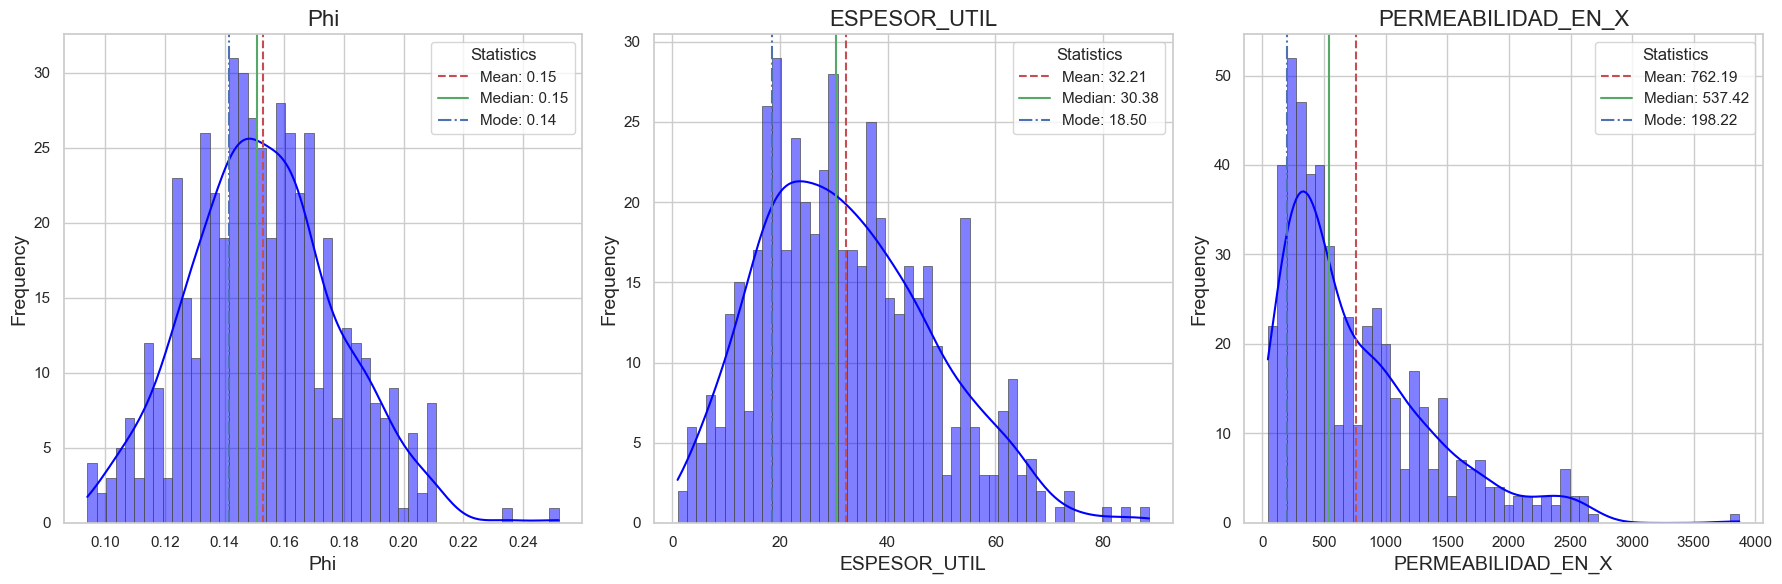

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with 1 row and 3 columns for the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Function to find the index of the bin with the maximum height
def find_mode_bin(hist, edges):
    max_bin_index = hist.argmax()
    return edges[max_bin_index], edges[max_bin_index + 1]

# Define the columns for the loop
columns = ['Phi', 'ESPESOR_UTIL', 'PERMEABILIDAD_EN_X']

for i, col in enumerate(columns):
    # Plot the histogram with a smoothed line
    sns.histplot(df_petrophysical[col], bins=50, color='blue', alpha=0.5, kde=True, ax=axes[i], palette="light:#5A9", edgecolor=".3", linewidth=.5)
    
    # Plot mean and median
    axes[i].axvline(df_petrophysical[col].mean(), color='r', linestyle='--', label=f'Mean: {df_petrophysical[col].mean():.2f}')
    axes[i].axvline(df_petrophysical[col].median(), color='g', linestyle='-', label=f'Median: {df_petrophysical[col].median():.2f}')
    
    # Find mode bin
    mode_bin = find_mode_bin(*np.histogram(df_petrophysical[col], bins=50))
    axes[i].axvline(mode_bin[0], color='b', linestyle='-.', label=f'Mode: {mode_bin[0]:.2f}')
    
    # Set labels and title
    axes[i].set_xlabel(col, fontsize=14)
    axes[i].set_ylabel('Frequency', fontsize=14)
    axes[i].set_title(col, fontsize=16)
    axes[i].legend(title="Statistics")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


# CAPAS

In [110]:
# The scope of this project is Ti and Ui layers
df_capas = pd.DataFrame({'Formación': ['T', 'U'],
                        'Capa': ['TI', 'UI']
                        })
df_capas

,Formación,Capa
0,T,TI
1,U,UI


# CONVERSIONES

In [111]:
df_iny_month.head()

,WELLBORE_ID,UNIQUEID,Date,WATER_INJ_VOL,WATER_INJ_AVG,DAYS,Pia,Pia_Days,WHP,CAPA,INJ_TYPE,WATER_INJ_.CUM
3,S-5IT,SCH-005IT,11/01/2009,128971.0,4299.033,30.0,0.0,0,NaN,TI,water,128971.0
4,S-5IT,SCH-005IT,12/01/2009,134078.0,4325.097,31.0,0.0,0,NaN,TI,water,263049.0
5,S-5IT,SCH-005IT,01/01/2010,137696.0,4441.806,31.0,0.0,0,NaN,TI,water,400745.0
6,S-5IT,SCH-005IT,02/01/2010,139108.0,4968.143,28.0,0.0,0,NaN,TI,water,539853.0
7,S-5IT,SCH-005IT,03/01/2010,137382.0,4431.677,31.0,0.0,0,NaN,TI,water,677235.0


In [112]:
df_mensual_Ui_Ti.head()

,IDENTIFICADOR,FECHA,PETROLEO,AGUA,GASP,TIEMPO_EFECTIVO,OIL_cum,GAS_cum,WAT_cum,NOMBRE_COMPLETO,RSVR_NAME
0,S-2BTI,11/30/2007,9387.29,1515.49,2816.19,30.0,9387.29,2816.19,1515.49,SCH-002BTI,TI
1,S-2BTI,12/31/2007,10136.88,1317.22,3041.06,31.0,19524.17,5857.25,2832.71,SCH-002BTI,TI
2,S-2BTI,01/31/2008,8469.48,1046.79,2540.84,31.0,27993.65,8398.09,3879.50,SCH-002BTI,TI
3,S-2BTI,02/29/2008,7967.25,1148.60,2390.18,29.0,35960.90,10788.27,5028.10,SCH-002BTI,TI
4,S-2BTI,03/31/2008,8668.35,1238.34,2600.51,31.0,44629.25,13388.78,6266.44,SCH-002BTI,TI


In [113]:
# Generate a copy of the dfs
df_iny_month_temp = df_iny_month_copy.copy()
_
df_iny_month_temp = df_iny_month_temp.rename(columns={'UNIQUEID': 'NOMBRE_COMPLETO', 'Date': 'FECHA'})
# Add the column 'ESTADO' of each dataframe
df_mensual_Ui_Ti_temp = df_mensual_Ui_Ti_temp.assign(ESTADO='Productor')
df_iny_month_temp = df_iny_month_temp.assign(ESTADO='Inyector')

# Put in the desired format and append the dataframes
df_conversions = df_mensual_Ui_Ti_temp[['NOMBRE_COMPLETO', 'FECHA', 'ESTADO']].append(df_iny_month_temp[['NOMBRE_COMPLETO', 'FECHA', 'ESTADO']], ignore_index=True)

df_conversions.head()

C:\Users\brand\AppData\Local\Temp\ipykernel_14912\1310526665.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_conversions = df_mensual_Ui_Ti_temp[['NOMBRE_COMPLETO', 'FECHA', 'ESTADO']].append(df_iny_month_temp[['NOMBRE_COMPLETO', 'FECHA', 'ESTADO']], ignore_index=True)


,NOMBRE_COMPLETO,FECHA,ESTADO
0,SCH-002BTI,2007-11-30,Productor
1,SCH-002BTI,2007-12-31,Productor
2,SCH-002BTI,2008-01-31,Productor
3,SCH-002BTI,2008-02-29,Productor
4,SCH-002BTI,2008-03-31,Productor


In [114]:
# delite the rows with nan
df_conversions = df_conversions[~df_conversions['NOMBRE_COMPLETO'].isnull()]

df_conversions.isna().sum()

NOMBRE_COMPLETO    0
FECHA              0
ESTADO             0
dtype: int64

In [115]:
df_iny_month_temp['NOMBRE_COMPLETO'].unique()

array(['SCH-005IT', 'SCH-005IU', 'SCH-015IU', 'SCH-036IUI', 'SCH-045BIUI',
       'SCH-048IT', 'SCH-048IU', 'SCH-076IT', 'SCH-076IU', 'SCH-090IU',
       'SCH-103IUI', 'SCH-105IT', 'SCH-105IU', 'SCHAB-315IUI',
       'SCHAD-361IUI', 'SCHAD-363S1IUI', 'SCHAE-377IUI', 'SCHAF-382IUI',
       'SCHAG-396IUI', 'SCHAK-431IUI', 'SCHE-232ITI', 'SCHI-067BIUI',
       'SCHI-200IUI', 'SCHM-340ITI', 'SCHS-261IUI'], dtype=object)

In [116]:
Inject_names = df_iny_month_temp['NOMBRE_COMPLETO'].unique()

# with regex extract the well from compleation name
initials = [re.match(r"\D+\d+", codigo)[0] for codigo in Inject_names]

# Create a dictionary with the initials as keys and the wells as values
dict_wells = {inicial: df_conversions[df_conversions['NOMBRE_COMPLETO'].str.startswith(inicial)]['NOMBRE_COMPLETO'].unique() for inicial in initials}

for key, value in dict_wells.items():
    print(key, value)

SCH-005 ['SCH-005TI' 'SCH-005UI' 'SCH-005IT' 'SCH-005IU']
SCH-015 ['SCH-015UI' 'SCH-015IU']
SCH-036 ['SCH-036UI' 'SCH-036US' 'SCH-036IUI']
SCH-045 ['SCH-045BTI' 'SCH-045BIUI']
SCH-048 ['SCH-048IT' 'SCH-048IU']
SCH-076 ['SCH-076IT' 'SCH-076IU']
SCH-090 ['SCH-090UI' 'SCH-090IU']
SCH-103 ['SCH-103UI' 'SCH-103IUI']
SCH-105 ['SCH-105IT' 'SCH-105IU']
SCHAB-315 ['SCHAB-315UI' 'SCHAB-315IUI']
SCHAD-361 ['SCHAD-361IUI']
SCHAD-363 ['SCHAD-363S1IUI']
SCHAE-377 ['SCHAE-377UI' 'SCHAE-377IUI']
SCHAF-382 ['SCHAF-382UI' 'SCHAF-382IUI']
SCHAG-396 ['SCHAG-396IUI']
SCHAK-431 ['SCHAK-431UI' 'SCHAK-431IUI']
SCHE-232 ['SCHE-232TI' 'SCHE-232ITI']
SCHI-067 ['SCHI-067BUI' 'SCHI-067UI' 'SCHI-067BIUI']
SCHI-200 ['SCHI-200IUI']
SCHM-340 ['SCHM-340ITI']
SCHS-261 ['SCHS-261UI' 'SCHS-261IUI']


In [117]:
# Extract the values of the dictionary
list_values_dict = list(np.concatenate(list(dict_wells.values())))

# Filter the dataframe with the values of the dictionary
df_filtrado = df_mensual_Ui_Ti_temp[(df_mensual_Ui_Ti_temp['NOMBRE_COMPLETO'].isin(list_values_dict)) & (
                                    df_mensual_Ui_Ti_temp['PETROLEO'] != 0) & (df_mensual_Ui_Ti_temp['PETROLEO'].notna())]

# Obtaining the last month of production for each well
resultado = df_filtrado.groupby('NOMBRE_COMPLETO')['FECHA'].idxmax()

# Select the rows corresponding to the last month of each well
df_conversions_prod = df_mensual_Ui_Ti_temp.loc[resultado].reset_index(drop=True)

# Merge with df_sc to obtain the reservoir name
df_conversions_prod = pd.merge(df_conversions_prod[['NOMBRE_COMPLETO',	'FECHA', 'ESTADO']], df_maestra[['WELLBORE_ID','COMPLETION_LEGAL_NAME', 'RSVR_NAME']],
                    left_on='NOMBRE_COMPLETO', right_on='COMPLETION_LEGAL_NAME', how = 'inner')

df_conversions_prod.rename(columns={'RSVR_NAME': 'CAPA'}, inplace=True)

# change date format
df_conversions_prod['FECHA'] = df_conversions_prod['FECHA'].dt.strftime('%m/%d/%Y')

# Imprimimos la tabla
df_conversions_prod.head()

,NOMBRE_COMPLETO,FECHA,ESTADO,WELLBORE_ID,COMPLETION_LEGAL_NAME,CAPA
0,SCH-005TI,09/30/1986,Productor,S-5TI,SCH-005TI,TI
1,SCH-005UI,09/30/1986,Productor,S-5UI,SCH-005UI,UI
2,SCH-015UI,12/31/1980,Productor,S-15UI,SCH-015UI,UI
3,SCH-036UI,02/29/2016,Productor,S-36UI,SCH-036UI,UI
4,SCH-036US,09/30/1972,Productor,S-36US,SCH-036US,UI


In [118]:
# Filter the dataframe with the values of the dictionary
df_filtrado = df_iny_month_temp[(df_iny_month_temp['NOMBRE_COMPLETO'].isin(list_values_dict)) & (df_iny_month_temp['WATER_INJ_VOL'] != 0) & (
                                df_iny_month_temp['WATER_INJ_VOL'].notna())]

# Obtaining the last month of injection for each well
resultado = df_filtrado.groupby('NOMBRE_COMPLETO')['FECHA'].idxmin()

# Select the rows corresponding to the last month of each well
df_conversions_iny = df_iny_month_temp.loc[resultado].reset_index(drop=True)

# change date format
df_conversions_iny['FECHA'] = df_conversions_iny['FECHA'].dt.strftime('%m/%d/%Y')

df_conversions_iny.head()

,WELLBORE_ID,NOMBRE_COMPLETO,FECHA,WATER_INJ_VOL,WATER_INJ_AVG,DAYS,Pia,Pia_Days,WHP,CAPA,INJ_TYPE,WATER_INJ_.CUM,ESTADO
0,S-5IT,SCH-005IT,11/01/2009,128971.0,4299.033,30.0,0.0,0,NaN,TI,water,128971.0,Inyector
1,S-5IU,SCH-005IU,11/01/2009,49518.0,1650.600,30.0,0.0,0,NaN,UI,water,49518.0,Inyector
2,S-15IU,SCH-015IU,11/01/2009,52439.0,1747.967,30.0,0.0,0,NaN,UI,water,52439.0,Inyector
3,S-36IUI,SCH-036IUI,01/16/2019,70925.0,4432.812,16.0,9900.0,9,1100.0,UI,water,70925.0,Inyector
4,S-45BIUI,SCH-045BIUI,02/01/2019,21740.0,3105.714,7.0,400.0,2,200.0,UI,water,21740.0,Inyector


In [119]:
df_conversions_iny.head()

,WELLBORE_ID,NOMBRE_COMPLETO,FECHA,WATER_INJ_VOL,WATER_INJ_AVG,DAYS,Pia,Pia_Days,WHP,CAPA,INJ_TYPE,WATER_INJ_.CUM,ESTADO
0,S-5IT,SCH-005IT,11/01/2009,128971.0,4299.033,30.0,0.0,0,NaN,TI,water,128971.0,Inyector
1,S-5IU,SCH-005IU,11/01/2009,49518.0,1650.600,30.0,0.0,0,NaN,UI,water,49518.0,Inyector
2,S-15IU,SCH-015IU,11/01/2009,52439.0,1747.967,30.0,0.0,0,NaN,UI,water,52439.0,Inyector
3,S-36IUI,SCH-036IUI,01/16/2019,70925.0,4432.812,16.0,9900.0,9,1100.0,UI,water,70925.0,Inyector
4,S-45BIUI,SCH-045BIUI,02/01/2019,21740.0,3105.714,7.0,400.0,2,200.0,UI,water,21740.0,Inyector


In [120]:
df_conversions_prod.head()

,NOMBRE_COMPLETO,FECHA,ESTADO,WELLBORE_ID,COMPLETION_LEGAL_NAME,CAPA
0,SCH-005TI,09/30/1986,Productor,S-5TI,SCH-005TI,TI
1,SCH-005UI,09/30/1986,Productor,S-5UI,SCH-005UI,UI
2,SCH-015UI,12/31/1980,Productor,S-15UI,SCH-015UI,UI
3,SCH-036UI,02/29/2016,Productor,S-36UI,SCH-036UI,UI
4,SCH-036US,09/30/1972,Productor,S-36US,SCH-036US,UI


In [121]:
df_conversions = df_conversions_iny[['WELLBORE_ID', 'NOMBRE_COMPLETO', 'CAPA', 'FECHA', 'ESTADO']].append(df_conversions_prod[
                ['WELLBORE_ID', 'NOMBRE_COMPLETO', 'CAPA', 'FECHA', 'ESTADO']], ignore_index=True).rename(columns={'NOMBRE_COMPLETO': 'IDENTIFICADOR', 'FECHA': 'FECHA'})
df_conversions.head()

C:\Users\brand\AppData\Local\Temp\ipykernel_14912\4071583055.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_conversions = df_conversions_iny[['WELLBORE_ID', 'NOMBRE_COMPLETO', 'CAPA', 'FECHA', 'ESTADO']].append(df_conversions_prod[


,WELLBORE_ID,IDENTIFICADOR,CAPA,FECHA,ESTADO
0,S-5IT,SCH-005IT,TI,11/01/2009,Inyector
1,S-5IU,SCH-005IU,UI,11/01/2009,Inyector
2,S-15IU,SCH-015IU,UI,11/01/2009,Inyector
3,S-36IUI,SCH-036IUI,UI,01/16/2019,Inyector
4,S-45BIUI,SCH-045BIUI,UI,02/01/2019,Inyector


In [122]:
df_conversions.dtypes

WELLBORE_ID      object
IDENTIFICADOR    object
CAPA             object
FECHA            object
ESTADO           object
dtype: object

# PORCENTAJES DE INYECCIÓN

In [123]:
df_iny_month.head()

,WELLBORE_ID,UNIQUEID,Date,WATER_INJ_VOL,WATER_INJ_AVG,DAYS,Pia,Pia_Days,WHP,CAPA,INJ_TYPE,WATER_INJ_.CUM
3,S-5IT,SCH-005IT,11/01/2009,128971.0,4299.033,30.0,0.0,0,NaN,TI,water,128971.0
4,S-5IT,SCH-005IT,12/01/2009,134078.0,4325.097,31.0,0.0,0,NaN,TI,water,263049.0
5,S-5IT,SCH-005IT,01/01/2010,137696.0,4441.806,31.0,0.0,0,NaN,TI,water,400745.0
6,S-5IT,SCH-005IT,02/01/2010,139108.0,4968.143,28.0,0.0,0,NaN,TI,water,539853.0
7,S-5IT,SCH-005IT,03/01/2010,137382.0,4431.677,31.0,0.0,0,NaN,TI,water,677235.0


In [124]:
df_iny_month['CAPA'].unique()

array(['TI', 'UI'], dtype=object)

In [125]:
# Create dummy variables for the column CAPA
df_dummies = pd.get_dummies(df_iny_month_copy['CAPA'])

# Concatenate the DataFrame with the dummy variables
df_percentage = pd.concat([df_iny_month_copy, df_dummies], axis=1)

# Assign 1 to the wells that have water injection or 0 if not
for capa in df_dummies.columns:
    df_percentage.loc[df_percentage['WATER_INJ_VOL'] > 0, capa] = df_percentage.loc[df_percentage['WATER_INJ_VOL'] > 0, capa].apply(lambda x: 1 if x == 1 else 0)
    df_percentage.loc[(df_percentage['WATER_INJ_VOL'] <= 0) | (df_percentage['WATER_INJ_VOL'].isnull()), capa] = 0

# change the format of the dates
df_percentage['Date'] = df_percentage['Date'].dt.strftime('%m/%d/%Y')

# Delete the rows with all values equal to zero
df_percentage = df_percentage.loc[(df_percentage[df_dummies.columns] != 0).any(axis=1)][['WELLBORE_ID', 'Date', 'TI', 'UI']]
df_percentage.rename(columns={'WELLBORE_ID': 'Pozo', 'Date': 'Fecha'}, inplace=True)

df_percentage.head()

,Pozo,Fecha,TI,UI
3,S-5IT,11/01/2009,1,0
4,S-5IT,12/01/2009,1,0
5,S-5IT,01/01/2010,1,0
6,S-5IT,02/01/2010,1,0
7,S-5IT,03/01/2010,1,0


# Atributos estáticos

In [126]:
df_static_attributes = df_wells[['UWI', 'Bloque']]
df_static_attributes.head()

,UWI,Bloque
0,SCH2BTI,SCHS
1,SCH2BUI,SCHS
2,SCH2TI,SCHS
3,SCH2UI,SCHS
4,SCH3TI,SCHN1


# SAVE FILTERED DATA

In [127]:
# Save dataframes to Excel file
with pd.ExcelWriter('Data_draft_Diana.xlsx') as writer:
    df_maestra.to_excel(writer, sheet_name='Maestra', index=False, float_format='%.0f')
    df_capas.to_excel(writer, sheet_name='Capas', index=False, float_format='%.0f')
    df_wells.to_excel(writer, sheet_name='Pozos', index=False)
    df_static_attributes.to_excel(writer, sheet_name='Atributos estáticos', index=False, float_format='%.0f')
    df_layer_status.to_excel(writer, sheet_name='Estado de Capa', index=False, float_format='%.0f')
    df_perf.to_excel(writer, sheet_name='Intervenciones', index=False, float_format='%.0f')
    df_percentage.to_excel(writer, sheet_name='Distribución de inyeccion', index=False, float_format='%.0f')
    df_production_test.to_excel(writer, sheet_name='Controles', index=False, float_format='%.2f')    #TODO: check the columns
    df_notas_2.to_excel(writer, sheet_name='AD-Estado', index=False, float_format='%.0f')
    df_petrophysical.to_excel(writer, sheet_name='Datos Pozo-Capa', index=False)
    df_eventos.to_excel(writer, sheet_name='Notas de pozo', index=False, float_format='%.0f')
    df_mensual_Ui_Ti.to_excel(writer, sheet_name='Producciones Mensuales', index=False, float_format='%.0f')
    df_iny_month.to_excel(writer, sheet_name='Inyección Mensual', index=False, float_format='%.0f')

    
    df_surveys.to_excel(writer, sheet_name='TRAYECTORIAS', index=False, float_format='%.0f')
    df_iny_diaria.to_excel(writer, sheet_name='INYECCIÓN DIARIA', index=False, float_format='%.0f')
    df_conversions.to_excel(writer, sheet_name='CONVERSIONES', index=False, float_format='%.0f')
    Potencial_WO.to_excel(writer, sheet_name='POTENCIAL WO', index=False, float_format='%.0f')|   

# ACUMULADOS

In [128]:
# amount of unique wells
unique_wells = list(merged_df['WELLBORE_ID'].unique())

In [129]:
def Accum_by_sand(sand):
    # Crear una lista para almacenar los resultados
    results = []

    # Iterar a través de los nombres de pozos en unique_wells
    for well_name in unique_wells:
        # Filtrar el DataFrame por 'RSVR_NAME' igual a 'Lower T Sandstone'
        filtered_df = merged_df[(merged_df['WELLBORE_ID'] == well_name) & (merged_df['RSVR_NAME'] == sand)]
        
        # Calcular la suma de 'OILP' para el pozo actual
        accum_oil = filtered_df['OILP'].sum()
        
        # Agregar el resultado a la lista de resultados
        results.append([well_name, accum_oil])

    # Crear un DataFrame a partir de la lista de resultados
    result_df = pd.DataFrame(results, columns=['Well_name', 'Accum_oil'])

    return result_df

In [130]:
# Accum_T_Low = Accum_by_sand('LOWER T')
# Accum_T_Low.head()

In [131]:
# Accum_U_Low = Accum_by_sand('LOWER U')
# Accum_U_Low.head()